# DataLab: Ansiedad, sintomas y escalas

## Carga de datos

In [ ]:
#!pip install hmmlearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd


df_Axd_Sint = pd.read_csv('enhanced_anxiety_dataset.csv')

df_Axd_Sint.head()

Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   29  Female     Artist          6.0                           2.7   
1   46   Other      Nurse          6.2                           5.7   
2   64    Male      Other          5.0                           3.7   
3   20  Female  Scientist          5.8                           2.8   
4   49  Female      Other          8.2                           2.3   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       181                                 10     Yes   
1                       200                                  8     Yes   
2                       117                                  4      No   
3                       360                                  6     Yes   
4                       247                                  4     Yes   

  Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm)  \
0                        No                   10               114   
1                       Yes                    1                62   
2                       Yes                    1                91   
3                        No                    4                86   
4                        No                    1                98   

   Breathing Rate (breaths/min)  Sweating Level (1-5) Dizziness Medication  \
0                            14                     4        No        Yes   
1                            23                     2       Yes         No   
2                            28                     3        No         No   
3                            17                     3        No         No   
4                            19                     4       Yes        Yes   

   Therapy Sessions (per month) Recent Major Life Event  Diet Quality (1-10)  \
0                             3                     Yes                    7   
1                             2                      No                    8   
2                             1                     Yes                    1   
3                             0                      No                    1   
4                             1                      No                    3   

   Anxiety Level (1-10)  
0                   5.0  
1                   3.0  
2                   1.0  
3                   2.0  
4                   1.0

In [4]:
df_Axd_Sint.shape

(11000, 19)

In [5]:

df_Axd_Fam = pd.read_csv('family_anxiety_14_dataset.csv')

df_Axd_Fam.head()

Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   58    Male      Nurse          6.2                           1.3   
1   39  Female   Engineer          8.6                           3.8   
2   42  Female     Doctor          6.6                           0.5   
3   43  Female    Athlete          7.0                           1.6   
4   55   Other    Athlete          7.6                           2.8   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       192                                 16      No   
1                       367                                 15      No   
2                       132                                  1      No   
3                       361                                 15      No   
4                       531                                  0      No   

  Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm)  \
0                       Yes                    1               117   
1                        No                   10               113   
2                        No                   10                79   
3                        No                    4                69   
4                        No                    3                65   

   Breathing Rate (breaths/min)  Sweating Level (1-5) Dizziness Medication  \
0                            21                     1        No        Yes   
1                            14                     3       Yes        Yes   
2                            20                     1       Yes         No   
3                            25                     2       Yes         No   
4                            12                     4        No         No   

   Therapy Sessions (per month) Recent Major Life Event  Diet Quality (1-10)  \
0                             9                      No                    1   
1                             6                     Yes                    3   
2                             1                      No                    6   
3                             5                     Yes                   10   
4                             6                     Yes                    4   

   Anxiety Level (1-10)  
0                   3.0  
1                   4.0  
2                   6.0  
3                   2.0  
4                   4.0

In [6]:
df_Axd_Fam.shape

(11000, 19)

In [7]:
## Analisis inicial
def analysis_cat(df):
    return pd.concat([df.dtypes, df.nunique(), df.isna().sum()], axis = 1).rename({0:'datatype', 1:'unique', 2:'missing'}).T



In [8]:
analysis_cat(df_Axd_Sint)

Age  Gender Occupation Sleep Hours Physical Activity (hrs/week)  \
0  int64  object     object     float64                      float64   
1     47       3         13          82                          100   
2      0       0          0           0                            0   

  Caffeine Intake (mg/day) Alcohol Consumption (drinks/week) Smoking  \
0                    int64                             int64  object   
1                      600                                20       2   
2                        0                                 0       0   

  Family History of Anxiety Stress Level (1-10) Heart Rate (bpm)  \
0                    object               int64            int64   
1                         2                  10               60   
2                         0                   0                0   

  Breathing Rate (breaths/min) Sweating Level (1-5) Dizziness Medication  \
0                        int64                int64    object     object   
1                           18                    5         2          2   
2                            0                    0         0          0   

  Therapy Sessions (per month) Recent Major Life Event Diet Quality (1-10)  \
0                        int64                  object               int64   
1                           13                       2                  10   
2                            0                       0                   0   

  Anxiety Level (1-10)  
0              float64  
1                   10  
2                    0

In [9]:
analysis_cat(df_Axd_Fam)    

Age  Gender Occupation Sleep Hours Physical Activity (hrs/week)  \
0  int64  object     object     float64                      float64   
1     47       3         13         109                          102   
2      0       0          0           0                            0   

  Caffeine Intake (mg/day) Alcohol Consumption (drinks/week) Smoking  \
0                    int64                             int64  object   
1                      600                                20       2   
2                        0                                 0       0   

  Family History of Anxiety Stress Level (1-10) Heart Rate (bpm)  \
0                    object               int64            int64   
1                         2                  10               60   
2                         0                   0                0   

  Breathing Rate (breaths/min) Sweating Level (1-5) Dizziness Medication  \
0                        int64                int64    object     object   
1                           18                    5         2          2   
2                            0                    0         0          0   

  Therapy Sessions (per month) Recent Major Life Event Diet Quality (1-10)  \
0                        int64                  object               int64   
1                           10                       2                  10   
2                            0                       0                   0   

  Anxiety Level (1-10)  
0              float64  
1                   10  
2                    0

In [10]:
## Consolidacion de dataset

df_health = pd.concat([df_Axd_Fam, df_Axd_Sint]).reset_index().drop('index', axis = 1).copy()
df_health.head(5)

Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   58    Male      Nurse          6.2                           1.3   
1   39  Female   Engineer          8.6                           3.8   
2   42  Female     Doctor          6.6                           0.5   
3   43  Female    Athlete          7.0                           1.6   
4   55   Other    Athlete          7.6                           2.8   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       192                                 16      No   
1                       367                                 15      No   
2                       132                                  1      No   
3                       361                                 15      No   
4                       531                                  0      No   

  Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm)  \
0                       Yes                    1               117   
1                        No                   10               113   
2                        No                   10                79   
3                        No                    4                69   
4                        No                    3                65   

   Breathing Rate (breaths/min)  Sweating Level (1-5) Dizziness Medication  \
0                            21                     1        No        Yes   
1                            14                     3       Yes        Yes   
2                            20                     1       Yes         No   
3                            25                     2       Yes         No   
4                            12                     4        No         No   

   Therapy Sessions (per month) Recent Major Life Event  Diet Quality (1-10)  \
0                             9                      No                    1   
1                             6                     Yes                    3   
2                             1                      No                    6   
3                             5                     Yes                   10   
4                             6                     Yes                    4   

   Anxiety Level (1-10)  
0                   3.0  
1                   4.0  
2                   6.0  
3                   2.0  
4                   4.0

In [11]:
df_health.shape

(22000, 19)

In [12]:
analysis_cat(df_health) 

Age  Gender Occupation Sleep Hours Physical Activity (hrs/week)  \
0  int64  object     object     float64                      float64   
1     47       3         13         109                          105   
2      0       0          0           0                            0   

  Caffeine Intake (mg/day) Alcohol Consumption (drinks/week) Smoking  \
0                    int64                             int64  object   
1                      600                                20       2   
2                        0                                 0       0   

  Family History of Anxiety Stress Level (1-10) Heart Rate (bpm)  \
0                    object               int64            int64   
1                         2                  10               60   
2                         0                   0                0   

  Breathing Rate (breaths/min) Sweating Level (1-5) Dizziness Medication  \
0                        int64                int64    object     object   
1                           18                    5         2          2   
2                            0                    0         0          0   

  Therapy Sessions (per month) Recent Major Life Event Diet Quality (1-10)  \
0                        int64                  object               int64   
1                           13                       2                  10   
2                            0                       0                   0   

  Anxiety Level (1-10)  
0              float64  
1                   10  
2                    0

In [13]:
df_health.duplicated().sum()

np.int64(0)

## Entendimiendo de variables del dataset

In [14]:
## Sepacion de variables numericas y categoricas

df_col_num = df_health.select_dtypes(['int64', 'float64']).columns.copy()
df_col_cat = df_health.select_dtypes('object').columns.copy()

In [15]:
## Clasificacion de variables numericas
## Por escalas, lista de variables


df_col_num_disc = ['Stress Level (1-10)', 'Sweating Level (1-5)',
                   'Diet Quality (1-10)', 'Anxiety Level (1-10)'] # Few unique values
df_col_num_med = ['Alcohol Consumption (drinks/week)',
                  'Breathing Rate (breaths/min)',
                  'Therapy Sessions (per month)']
df_col_num_cont = df_health[df_col_num].drop(df_col_num_disc,axis =1).drop(df_col_num_med, axis = 1).columns.copy()

In [16]:
##Lista de variables numéricas discretas, es decir, variables con pocos valores únicos

analysis_cat(df_health[df_col_num_disc])

Stress Level (1-10) Sweating Level (1-5) Diet Quality (1-10)  \
0               int64                int64               int64   
1                  10                    5                  10   
2                   0                    0                   0   

  Anxiety Level (1-10)  
0              float64  
1                   10  
2                    0

In [17]:
##lista de variables numéricas de tipo "media" o intermedias, que representan cantidades contables o tasas 


analysis_cat(df_health[df_col_num_med])

Alcohol Consumption (drinks/week) Breathing Rate (breaths/min)  \
0                             int64                        int64   
1                                20                           18   
2                                 0                            0   

  Therapy Sessions (per month)  
0                        int64  
1                           13  
2                            0

In [18]:
###Calcula las variables numéricas continuas.Lo hace tomando todas las columnas numéricas (df_col_num) y eliminando las que están en df_col_num_disc y df_col_num_med.
#El resultado es una lista de nombres de columnas que representan variables numéricas continuas (con muchos valores posibles).

analysis_cat(df_health[df_col_num_cont])

Age Sleep Hours Physical Activity (hrs/week) Caffeine Intake (mg/day)  \
0  int64     float64                      float64                    int64   
1     47         109                          105                      600   
2      0           0                            0                        0   

  Heart Rate (bpm)  
0            int64  
1               60  
2                0

In [19]:
## Analisis de variables categoricas

analysis_cat(df_health[df_col_cat])

Gender Occupation Smoking Family History of Anxiety Dizziness Medication  \
0  object     object  object                    object    object     object   
1       3         13       2                         2         2          2   
2       0          0       0                         0         0          0   

  Recent Major Life Event  
0                  object  
1                       2  
2                       0

## Analisis exploratorio

In [20]:
##Preparacion de datos para analisis

# Turning numbers into scientific notation
# For smaller numbers
# if p value is 0, then the computer can't reach number that small
def scien_not(num, dec):
    science = ('%E' % num).split('E')
    return str(round(float(science[0]), dec)) + '*10^' + str(int(science[1]))

In [21]:
from scipy.stats import chi2_contingency

def chi2_con(tabla):
    """Calcula el test chi-cuadrado de independencia para una tabla de contingencia."""
    chi2, p, dof, expected = chi2_contingency(tabla)
    # Devuelve un objeto simple con atributo pvalue para compatibilidad con el código existente
    class Result:
        def __init__(self, pvalue):
            self.pvalue = pvalue
    return Result(p)

### Analisis: escalas numericas

Este código es una visualización cruzada de variables discretas numéricas contenidas en un DataFrame llamado df_health, usando matplotlib. Sirve para:

-Visualizar distribuciones (cuando se cruza una variable consigo misma).
-Visualizar tablas de contingencia (frecuencias cruzadas) con anotaciones y colores.
-Evaluar relaciones estadísticas (p-valores del test chi-cuadrado) entre pares de variables.


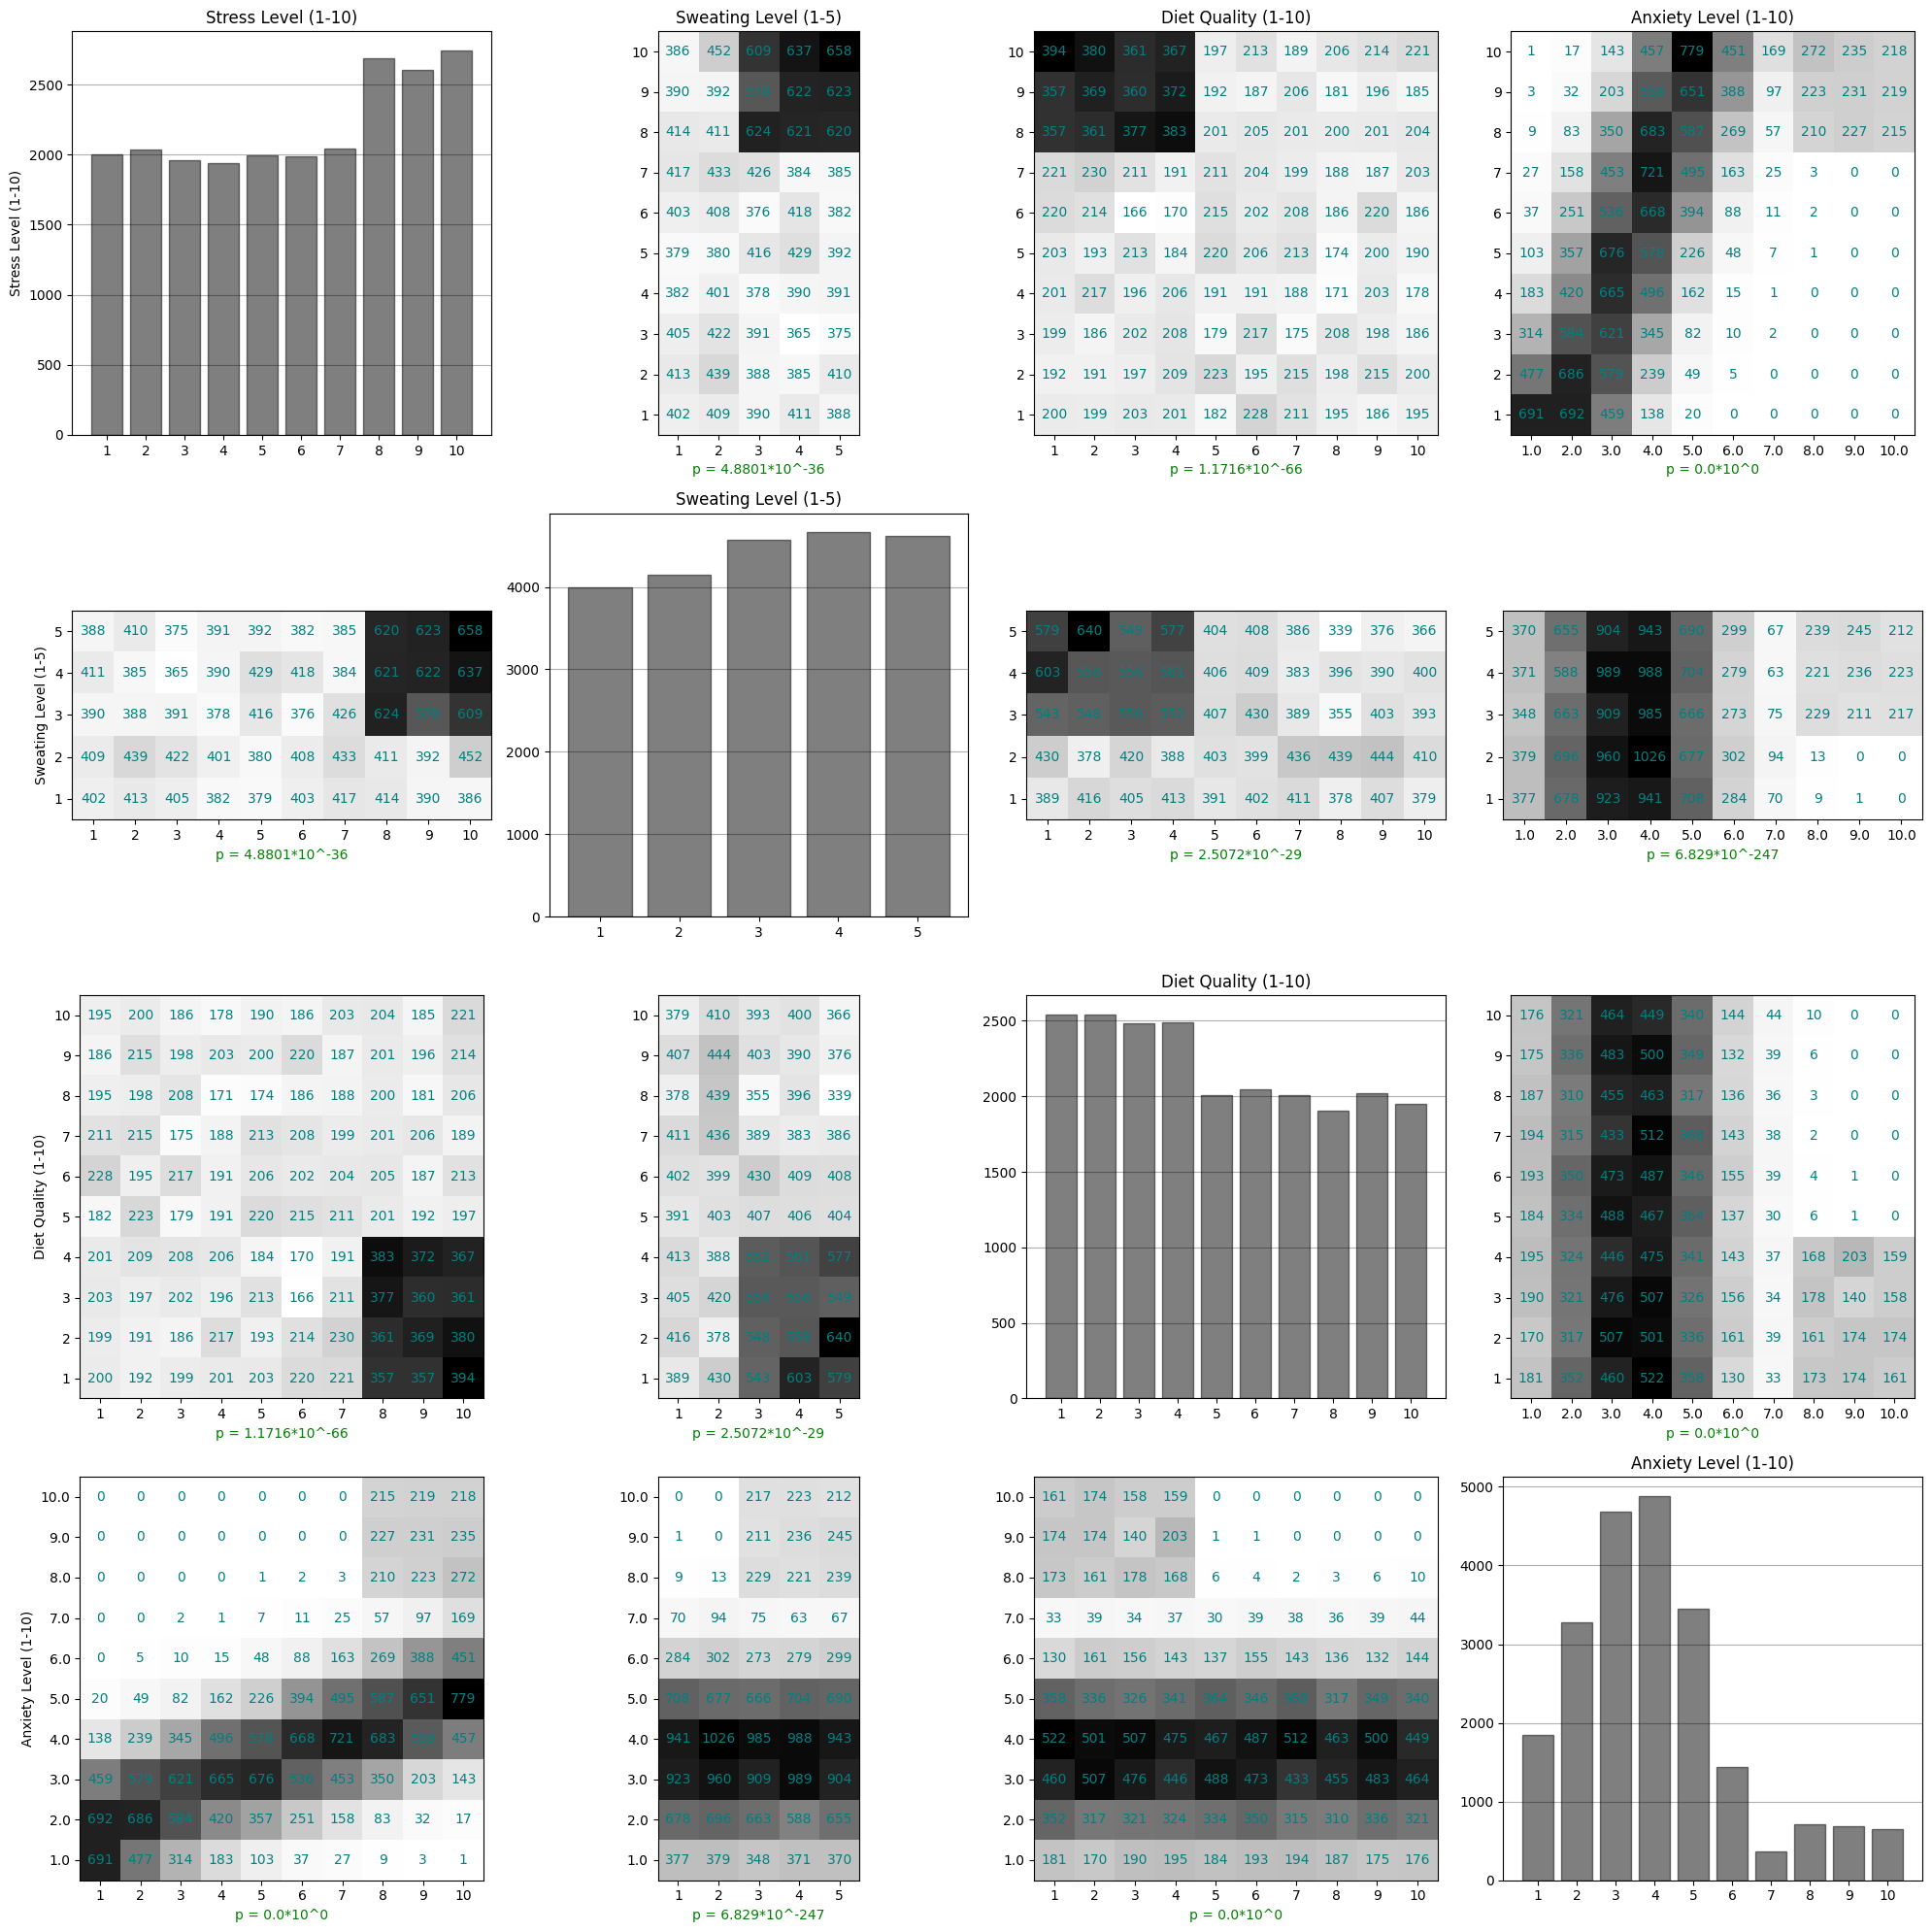

In [22]:
#Short Numerical Values


plt.figure(figsize = (20, 20))
count = 0
size_1 = 4
size_2 = 4
for i in df_col_num_disc:
    for j in df_col_num_disc:
        count += 1
        plt.subplot(size_1, size_2, count)
        if count <= size_2:
            plt.title(j)
        if (count % size_1) ==1:
            plt.ylabel(i)
        if i == j:
            plt.title(j)
            val_con = df_health[i].value_counts()
            plt.bar(val_con.index,val_con, color = 'black',alpha =0.5, edgecolor = 'black', zorder = 2)
            plt.grid(axis = 'y', zorder = 1)
            plt.xticks(val_con.index)
        if i != j:
            data = pd.crosstab(df_health[i], df_health[j]).loc[df_health[i].value_counts().sort_index(ascending = False).index]
            plt.imshow(data, cmap = 'Greys')
            plt.yticks(ticks = [i for i in range(0, df_health[i].nunique())],
                       labels = df_health[i].value_counts().sort_index(ascending = False).index)
            plt.xticks(ticks = [i for i in range(0, df_health[j].nunique())],
                       labels = df_health[j].value_counts().sort_index().index)
            x = 0
            for m in data.columns:
                y = 0
                for n in data.index:
                    plt.text(x, y, data[m][n], ha = 'center', va = 'center', color = 'teal')
                    y += 1
                x += 1
            chi2_p = chi2_con(pd.crosstab(df_health[i], df_health[j])).pvalue
            if chi2_p >= 0.05:
                color = 'red'
            if chi2_p < 0.05:
                color = 'green'
            plt.xlabel('p = ' + scien_not(chi2_p, 4), color = color)
plt.tight_layout()
plt.show()


### Analisis: Variables medias

Visualiza la distribución y relación estadística entre todas las variables numéricas medias, mostrando tanto la fuerza de la relación (p-valor) como la frecuencia de combinaciones de valores. Es útil para análisis exploratorio y detección de asociaciones entre variables.

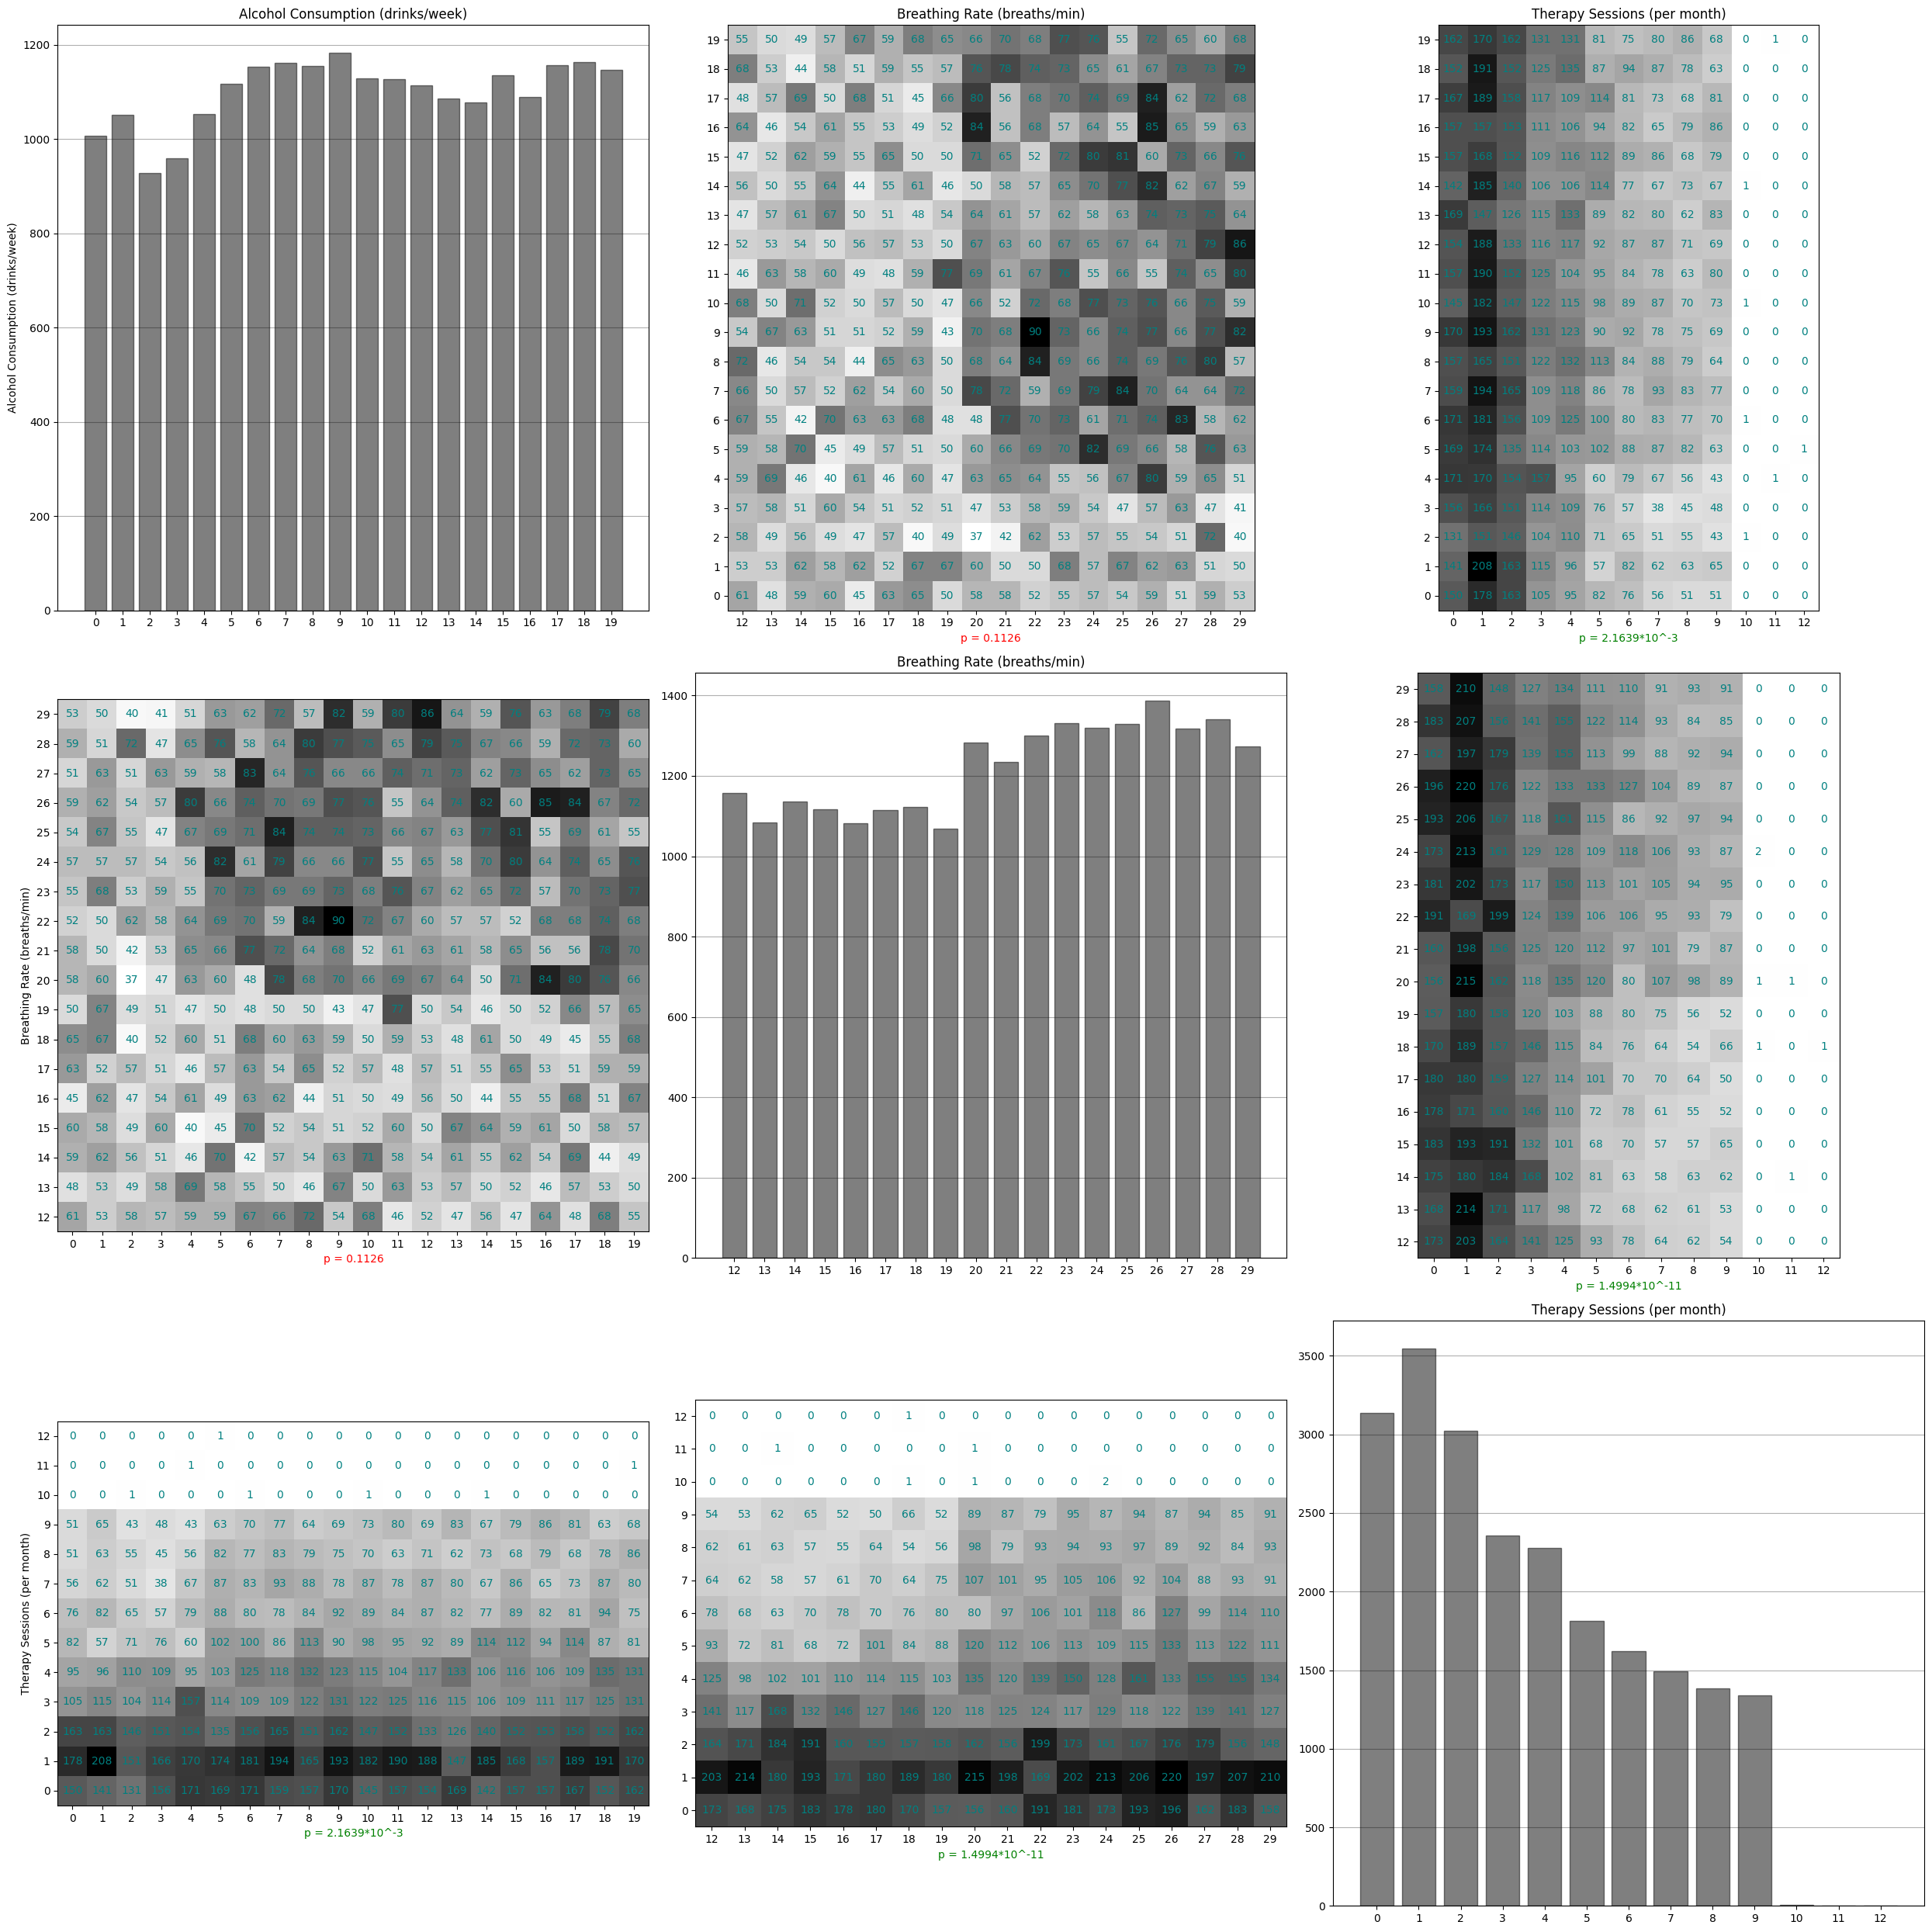

In [23]:
# Medium Numerical Values

plt.figure(figsize = (25, 25))
count = 0
size_1 = 3
size_2 = 3
for i in df_col_num_med:
    for j in df_col_num_med:
        count += 1
        plt.subplot(size_1, size_2, count)
        if count <= size_1:
            plt.title(j)
        if (count % size_1) ==1:
            plt.ylabel(i)
        if i == j:
            plt.title(j)
            val_con = df_health[i].value_counts()
            plt.bar(val_con.index,val_con, color = 'black',alpha =0.5, edgecolor = 'black', zorder = 2)
            plt.grid(axis = 'y', zorder = 1)
            plt.xticks(val_con.index)
        if i != j:
            data = pd.crosstab(df_health[i], df_health[j]).loc[df_health[i].value_counts().sort_index(ascending = False).index]
            plt.imshow(data, cmap = 'Greys')
            plt.yticks(ticks = [i for i in range(0, df_health[i].nunique())],
                       labels = df_health[i].value_counts().sort_index(ascending = False).index)
            plt.xticks(ticks = [i for i in range(0, df_health[j].nunique())],
                       labels = df_health[j].value_counts().sort_index().index)
            x = 0
            for m in data.columns:
                y = 0
                for n in data.index:
                    plt.text(x, y, data[m][n], ha = 'center', va = 'center', color = 'teal')
                    y += 1
                x += 1
            chi2_p = chi2_con(pd.crosstab(df_health[i], df_health[j])).pvalue
            if chi2_p >= 0.05:
                color = 'red'
                valing = str(round(chi2_p, 4))
            if chi2_p < 0.05:
                color = 'green'
                valing = scien_not(chi2_p, 4)
            plt.xlabel('p = ' + valing, color = color)
plt.tight_layout()
plt.show()


### Analisis: variables en rangos

In [24]:
df_health[df_col_num_cont].describe()

Age   Sleep Hours  Physical Activity (hrs/week)  \
count  22000.000000  22000.000000                  22000.000000   
mean      40.328273      6.711559                      2.929300   
std       13.292906      1.435776                      1.832344   
min       18.000000      0.200000                      0.000000   
25%       29.000000      5.800000                      1.500000   
50%       40.000000      6.800000                      2.800000   
75%       51.000000      7.700000                      4.200000   
max       64.000000     12.500000                     11.200000   

       Caffeine Intake (mg/day)  Heart Rate (bpm)  
count              22000.000000      22000.000000  
mean                 299.690682         90.955000  
std                  160.062495         17.232164  
min                    0.000000         60.000000  
25%                  168.000000         76.000000  
50%                  292.000000         92.000000  
75%                  429.000000        106.000000  
max                  599.000000        119.000000

In [25]:
bin_cont = {
    'Age' : [18, 25, 35, 45, 55, 65],
    'Sleep Hours' : [i for i in range(0, 14)],
    'Physical Activity (hrs/week)' : [i for i in range(0, 13)],
    'Caffeine Intake (mg/day)' : [i * 100 for i in range(0, 7)],
    'Heart Rate (bpm)' : [60 + (i * 10) for i in range(0, 7)]
}

In [26]:
# Bang!
import matplotlib

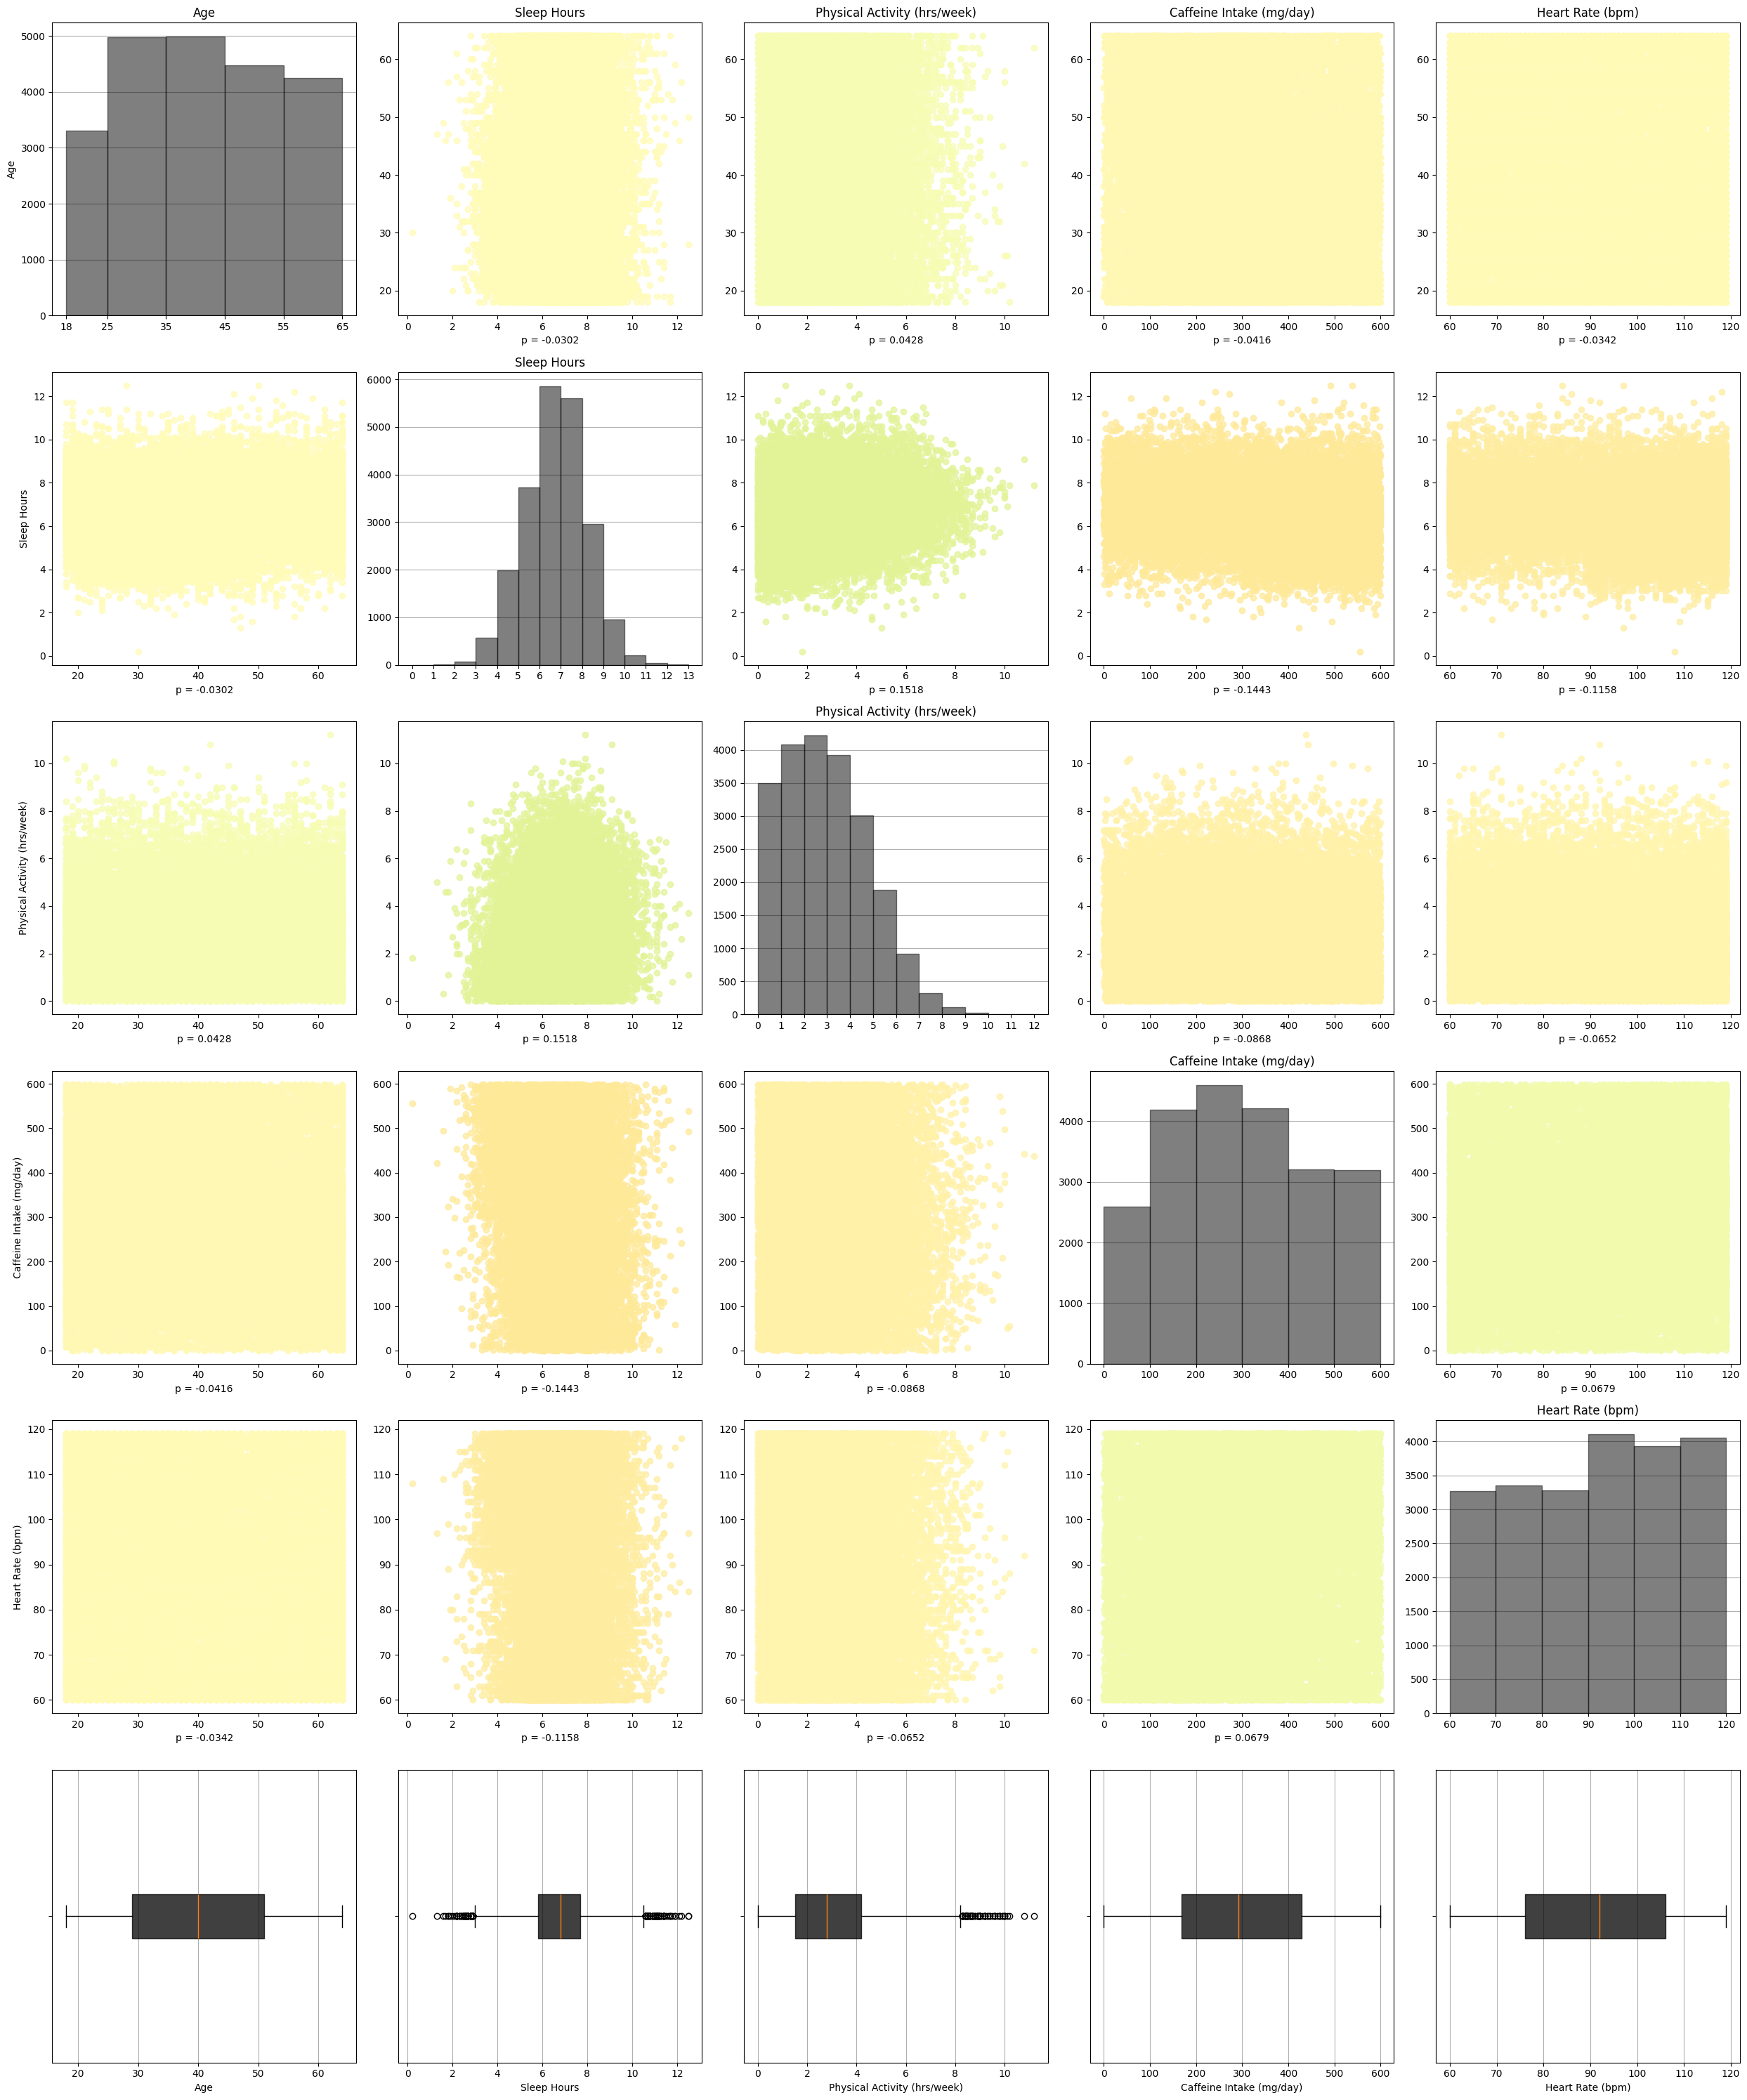

In [27]:
# Correlation between numerical value
# Red = negative corr; Yellow = no corr; Green = positive corr
ryg = matplotlib.colormaps['RdYlGn']
plt.figure(figsize = (25, 30))
count = 0
size_1 = 5
size_2 = 5
for i in df_col_num_cont:
    for j in df_col_num_cont:
        count += 1
        plt.subplot(size_1 + 1, size_2, count)
        if count <= size_1:
            plt.title(j)
        if (count % size_1) ==1:
            plt.ylabel(i)
        if i == j:
            plt.title(j)
            plt.hist(df_health[i], bins = bin_cont[i],color = 'black', alpha = 0.5, edgecolor = 'black', zorder = 2)
            plt.grid(axis = 'y', zorder = 1)
            plt.xticks(bin_cont[i])
        if i != j:
            corr_value = df_health[j].corr(df_health[i])
            color = ryg((corr_value + 1) / 2)
            plt.scatter(df_health[j], df_health[i], color = color, alpha =0.75)
            plt.xlabel('p = ' + str(round(corr_value, 4)))
for i in df_col_num_cont:
    count += 1
    plt.subplot(size_1 + 1, size_2, count)
    plt.boxplot(df_health[i], vert = False, zorder = 2, patch_artist = True,
                boxprops = dict(facecolor = 'black', alpha = 0.75))
    plt.grid(axis = 'x', zorder = 1)
    plt.yticks(ticks = [1], labels = [' '], rotation = 90, va = 'center')
    plt.xlabel(i)
plt.tight_layout()
plt.show()


### Analisis: Variables Categoricas

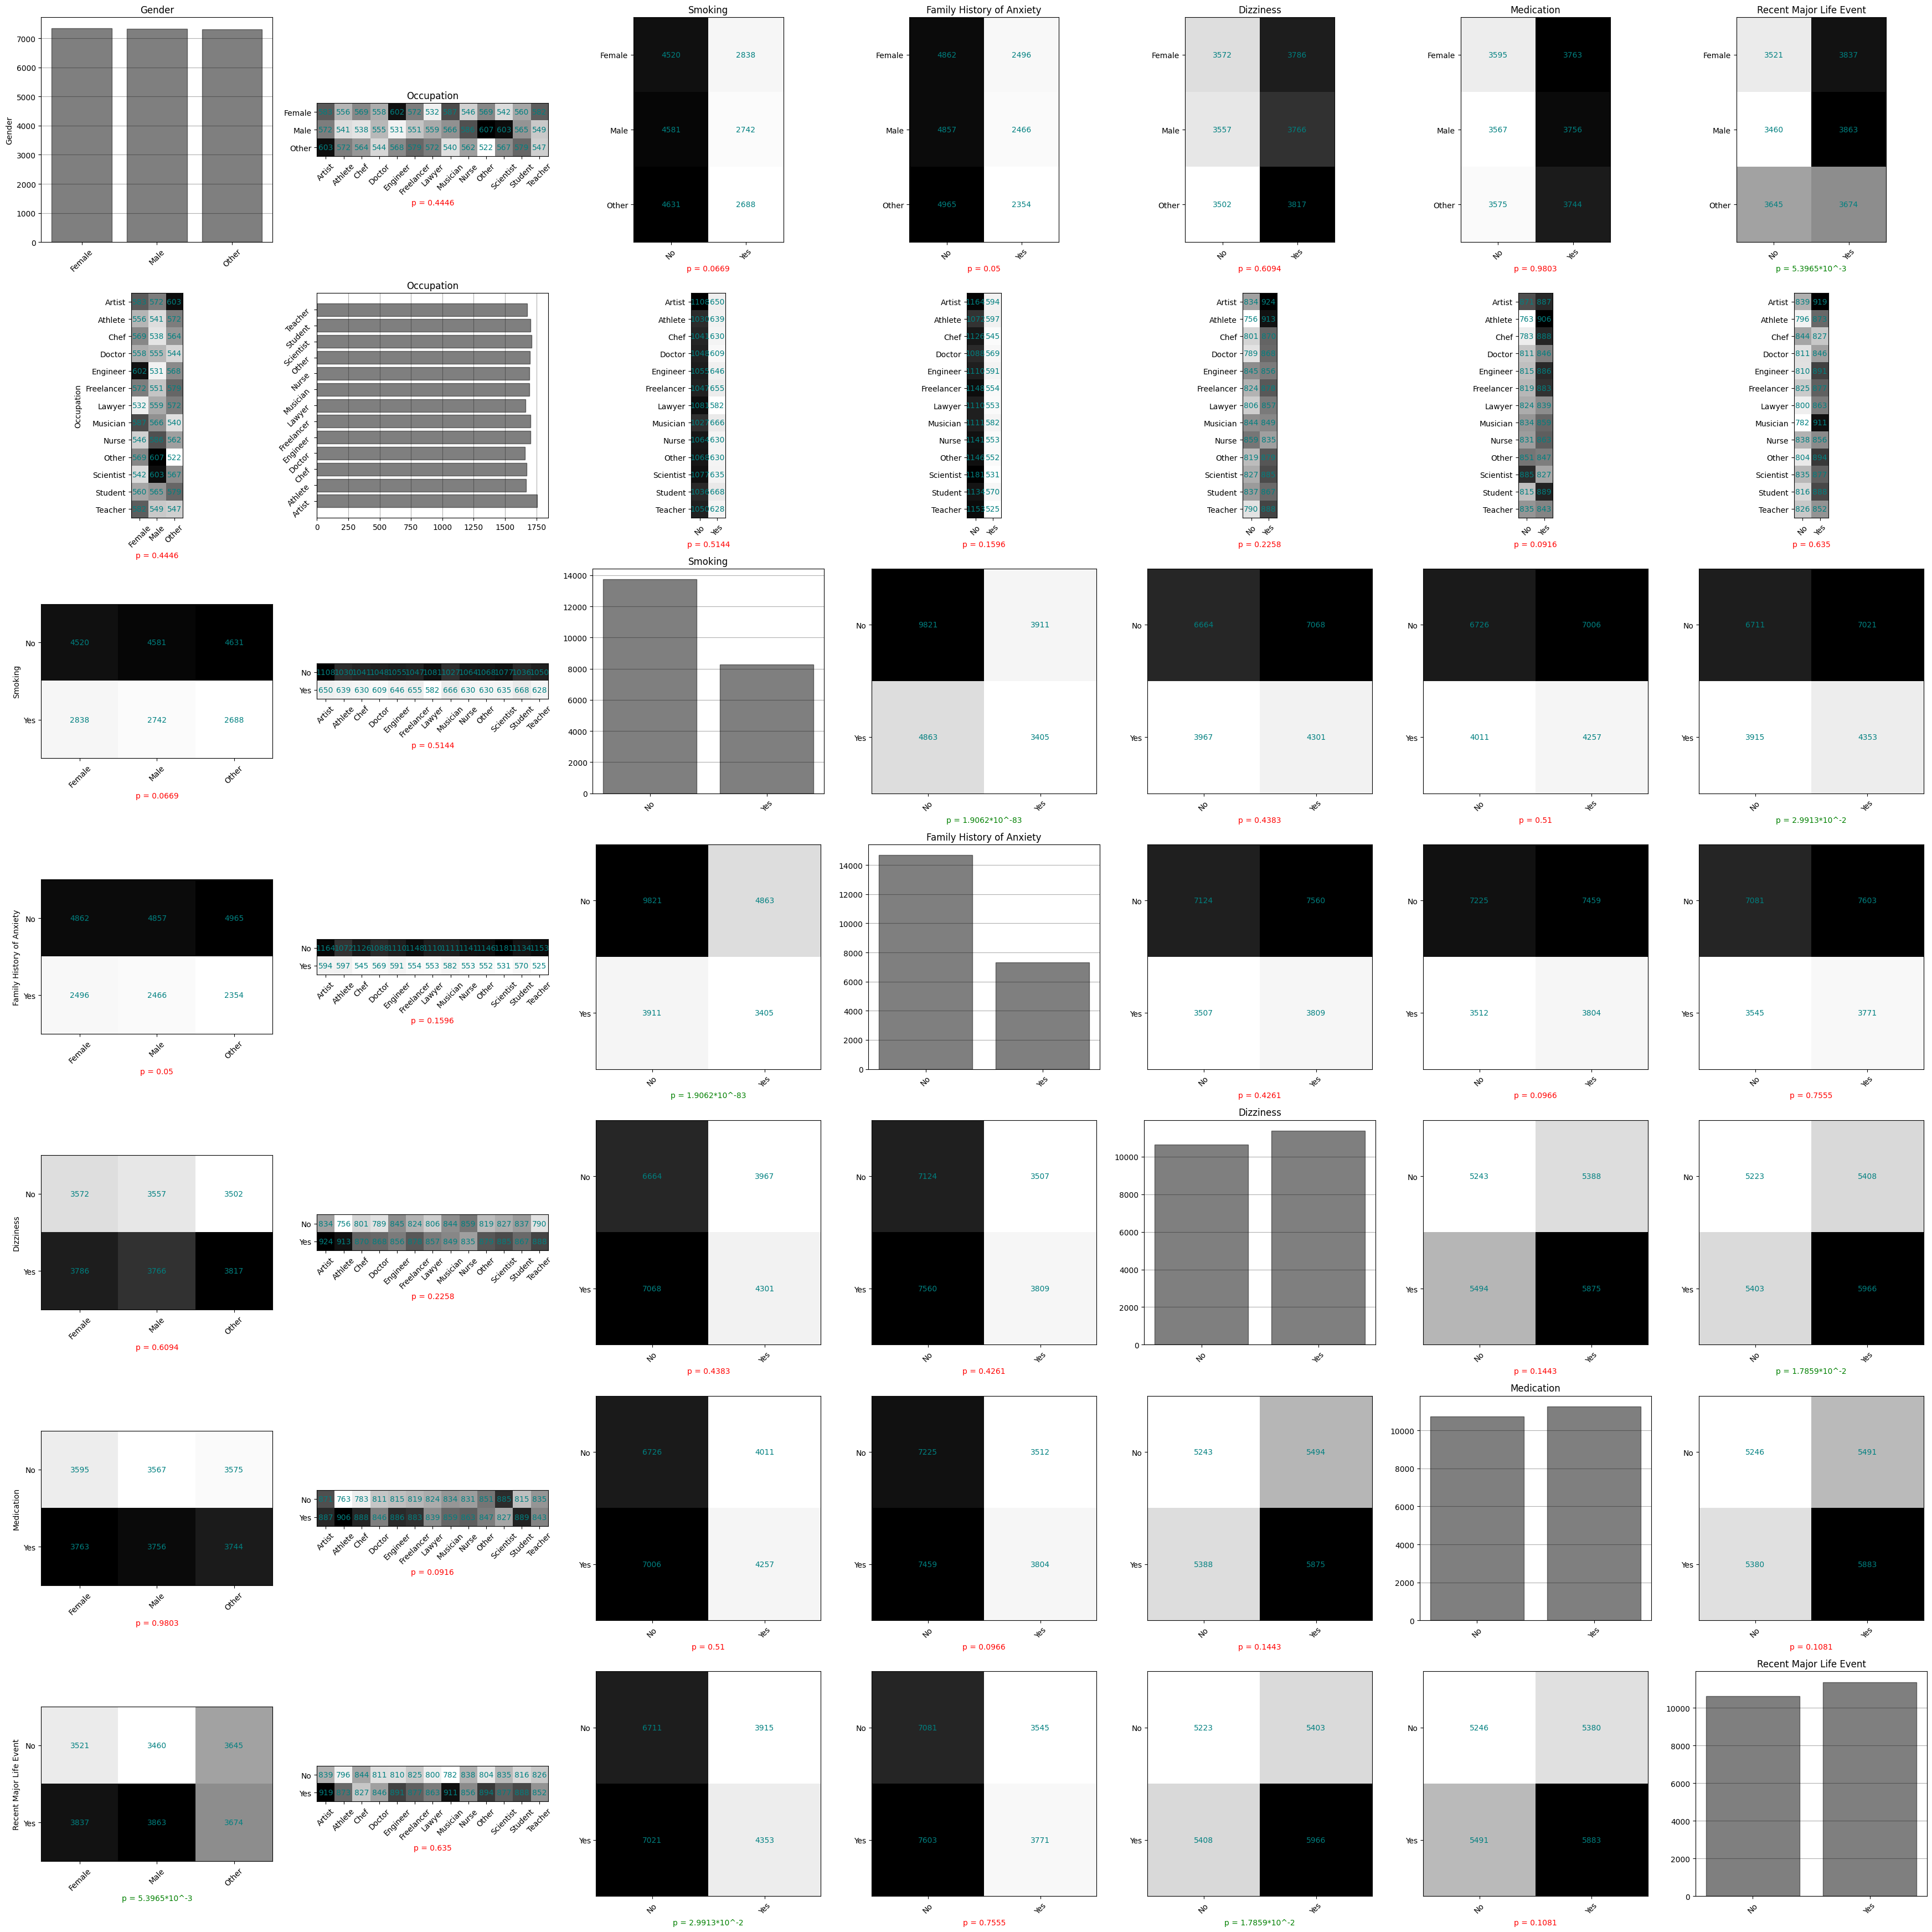

In [28]:
plt.figure(figsize = (35, 35))
count = 0
size_1 = 7
size_2 = 7
for i in df_col_cat:
    for j in df_col_cat:
        count += 1
        plt.subplot(size_1, size_2, count)
        if count <= size_2:
            plt.title(j)
        if (count % size_1) ==1:
            plt.ylabel(i)
        if i == j:
            plt.title(j)
            val_con = df_health[i].value_counts().sort_index()
            if i == 'Occupation':
                plt.barh(val_con.index,val_con, color = 'black',alpha =0.5, edgecolor = 'black', zorder = 2)
                plt.grid(axis = 'x', zorder = 1)
                plt.yticks(val_con.index, rotation = 45)
            if i != 'Occupation':
                plt.bar(val_con.index,val_con, color = 'black',alpha =0.5, edgecolor = 'black', zorder = 2)
                plt.grid(axis = 'y', zorder = 1)
                plt.xticks(val_con.index, rotation = 45)
        if i != j:
            data = pd.crosstab(df_health[i], df_health[j])
            plt.imshow(data, cmap = 'Greys')
            plt.yticks(ticks = [i for i in range(0, len(data.index))], labels = data.index)
            plt.xticks(ticks = [i for i in range(0, len(data.columns))], labels = data.columns, rotation = 45)
            x = 0
            for m in data.columns:
                y = 0
                for n in data.index:
                    plt.text(x, y, data[m][n], ha = 'center', va = 'center', color = 'teal')
                    y += 1
                x += 1
            chi2_p = chi2_con(pd.crosstab(df_health[i], df_health[j])).pvalue
            if chi2_p >= 0.05:
                color = 'red'
                valing = str(round(chi2_p, 4))
            if chi2_p < 0.05:
                color = 'green'
                valing = scien_not(chi2_p, 4)
            plt.xlabel('p = ' + valing, color = color)
plt.tight_layout()
plt.show()

## Prepracion de los datos

### Deteccion de outliers

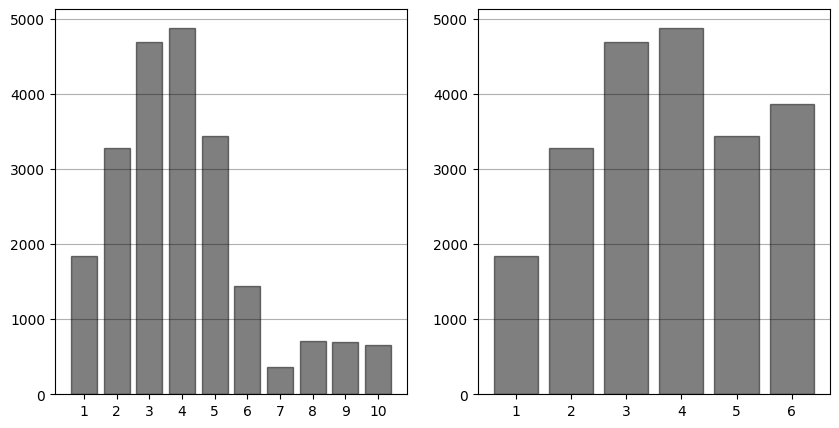

In [ ]:
 ##CCambiando los niveles de ansiedad de 1-10 a 1-6
 
plt.figure(figsize = (10, 5))
val_con = df_health['Anxiety Level (1-10)'].value_counts()
plt.subplot(1, 2, 1)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.xticks(val_con.index)

val_con = df_health['Anxiety Level (1-10)'].replace([6, 7, 8, 9, 10], 6).value_counts()
plt.subplot(1, 2, 2)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.show()

In [30]:
df_health['Anxiety Level (1-10)'] = df_health['Anxiety Level (1-10)'].replace([6, 7, 8, 9, 10], 6)

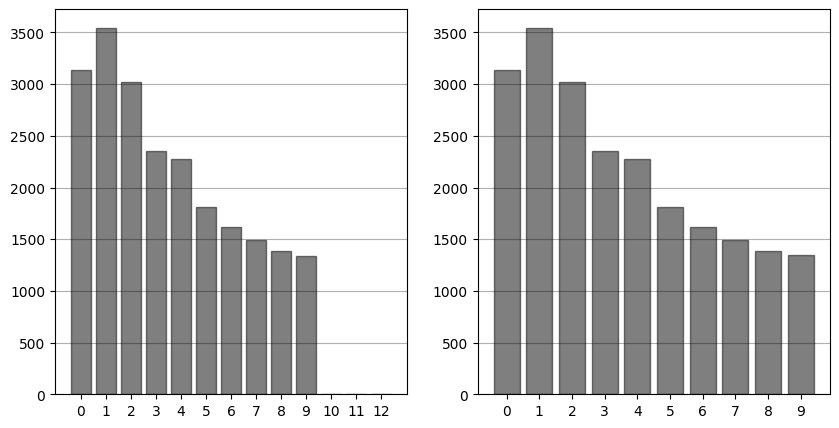

In [31]:
## cambiando las sesiones de terapia de 0 a 12 a 0 a 9 (o más de 9)

plt.figure(figsize = (10, 5))
val_con = df_health['Therapy Sessions (per month)'].value_counts()
plt.subplot(1, 2, 1)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.xticks(val_con.index)

val_con = df_health['Therapy Sessions (per month)'].replace([10, 11, 12], 9).value_counts()
plt.subplot(1, 2, 2)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.xticks(val_con.index)
plt.show()

In [32]:
df_health['Therapy Sessions (per month)'] = df_health['Therapy Sessions (per month)'].replace([10, 11, 12], 9)

In [33]:
df_col_num_cont

Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Heart Rate (bpm)'],
      dtype='object')

In [34]:
df_health['Sleep Hours'].describe()

count    22000.000000
mean         6.711559
std          1.435776
min          0.200000
25%          5.800000
50%          6.800000
75%          7.700000
max         12.500000
Name: Sleep Hours, dtype: float64

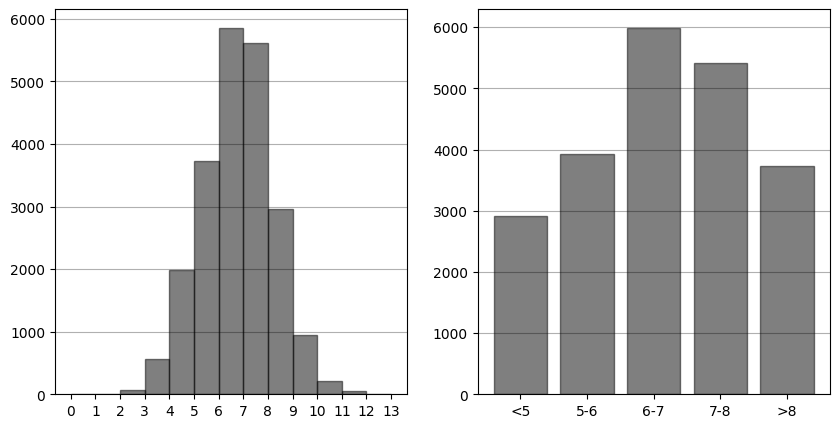

In [35]:

# Cambiando las horas de sueño en intervalos de (<5, 5-6, 6-7, 7-8, >8) (lo que se traduciría en 0, 1, 2, 3, 4)

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.hist(df_health['Sleep Hours'], bins = [i for i in range(0, 14)], edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.xticks([i for i in range(0, 14)])

val_con = pd.cut(df_health['Sleep Hours'], [-1, 5, 6, 7, 8, 13], labels = ['<5', '5-6', '6-7', '7-8', '>8']).value_counts().sort_index()
plt.subplot(1, 2, 2)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
#plt.xticks(ticks = []val_con.index)
plt.show()


In [36]:
df_health['Sleep Hours'] = pd.cut(df_health['Sleep Hours'], [-1, 5, 6, 7, 8, 13], labels = [0, 1, 2, 3, 4]).astype(int)

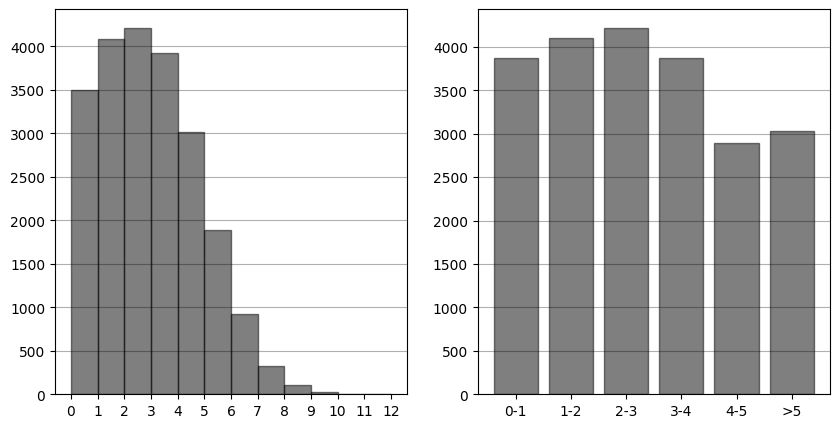

In [39]:


# Cambiando las horas de actividad fisica en intervalos de (0-1, 1-2, 2-3, 3-4, 4-5, >5) 
# ##(lo que se traduciría en 0, 1, 2, 3, 4, 5)
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.hist(df_health['Physical Activity (hrs/week)'], bins = [i for i in range(0, 13)], edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.xticks([i for i in range(0, 13)])

val_con = pd.cut(df_health['Physical Activity (hrs/week)'], [-1, 1, 2, 3, 4, 5, 12], labels = ['0-1','1-2', '2-3', '3-4', '4-5', '>5']).value_counts().sort_index()
plt.subplot(1, 2, 2)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)

plt.show()


In [40]:
df_health['Physical Activity (hrs/week)'] = pd.cut(df_health['Physical Activity (hrs/week)'], [-1, 1, 2, 3, 4, 5, 12], labels = [0, 1, 2, 3, 4, 5]).astype(int)

### Normalización 

In [ ]:
df_col_cat_dummy =  ['Gender', 'Occupation'] # Variable dummy

# Variable  categorica que se convertirá en binaria (True o False,)
df_col_cat_binary = ['Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']

# Normalizacion con MinMax
df_col_num_comb = df_col_num_disc + df_col_num_med + ['Sleep Hours', 'Physical Activity (hrs/week)']

# Reduccion de escala de las variables continuas
df_col_num_new_cont = ['Age', 'Caffeine Intake (mg/day)', 'Heart Rate (bpm)']

In [44]:
df_dummy = pd.get_dummies(df_health[df_col_cat_dummy])
df_dummy.head(5)

Gender_Female  Gender_Male  Gender_Other  Occupation_Artist  \
0          False         True         False              False   
1           True        False         False              False   
2           True        False         False              False   
3           True        False         False              False   
4          False        False          True              False   

   Occupation_Athlete  Occupation_Chef  Occupation_Doctor  \
0               False            False              False   
1               False            False              False   
2               False            False               True   
3                True            False              False   
4                True            False              False   

   Occupation_Engineer  Occupation_Freelancer  Occupation_Lawyer  \
0                False                  False              False   
1                 True                  False              False   
2                False                  False              False   
3                False                  False              False   
4                False                  False              False   

   Occupation_Musician  Occupation_Nurse  Occupation_Other  \
0                False              True             False   
1                False             False             False   
2                False             False             False   
3                False             False             False   
4                False             False             False   

   Occupation_Scientist  Occupation_Student  Occupation_Teacher  
0                 False               False               False  
1                 False               False               False  
2                 False               False               False  
3                 False               False               False  
4                 False               False               False

In [45]:
df_binary = (df_health[df_col_cat_binary] == 'Yes').copy()
df_binary.head(5)

Smoking  Family History of Anxiety  Dizziness  Medication  \
0    False                       True      False        True   
1    False                      False       True        True   
2    False                      False       True       False   
3    False                      False       True       False   
4    False                      False      False       False   

   Recent Major Life Event  
0                    False  
1                     True  
2                    False  
3                     True  
4                     True

In [46]:
df_health[df_col_num_new_cont].describe()

Age  Caffeine Intake (mg/day)  Heart Rate (bpm)
count  22000.000000              22000.000000      22000.000000
mean      40.328273                299.690682         90.955000
std       13.292906                160.062495         17.232164
min       18.000000                  0.000000         60.000000
25%       29.000000                168.000000         76.000000
50%       40.000000                292.000000         92.000000
75%       51.000000                429.000000        106.000000
max       64.000000                599.000000        119.000000

In [ ]:
#Reduccion de escala de las variables continuas

df_health['Age'] /= 10
df_health['Caffeine Intake (mg/day)'] /= 100
df_health['Heart Rate (bpm)'] /= 60
df_health[df_col_num_new_cont].describe()

Age  Caffeine Intake (mg/day)  Heart Rate (bpm)
count  22000.000000              22000.000000      22000.000000
mean       4.032827                  2.996907          1.515917
std        1.329291                  1.600625          0.287203
min        1.800000                  0.000000          1.000000
25%        2.900000                  1.680000          1.266667
50%        4.000000                  2.920000          1.533333
75%        5.100000                  4.290000          1.766667
max        6.400000                  5.990000          1.983333

In [49]:
##Nuevo dataset consolidado

df_col_num_comb += df_col_num_new_cont
df_col_num_comb

['Stress Level (1-10)',
 'Sweating Level (1-5)',
 'Diet Quality (1-10)',
 'Anxiety Level (1-10)',
 'Alcohol Consumption (drinks/week)',
 'Breathing Rate (breaths/min)',
 'Therapy Sessions (per month)',
 'Sleep Hours',
 'Physical Activity (hrs/week)',
 'Age',
 'Caffeine Intake (mg/day)',
 'Heart Rate (bpm)',
 'Age',
 'Caffeine Intake (mg/day)',
 'Heart Rate (bpm)']

### Escalamiento de variables con minmax

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
df_num = pd.DataFrame(MinMaxScaler().fit_transform(df_health[df_col_num_comb]), columns = df_col_num_comb)

In [57]:
df_num.head(5)

Stress Level (1-10)  Sweating Level (1-5)  Diet Quality (1-10)  \
0             0.000000                  0.00             0.000000   
1             1.000000                  0.50             0.222222   
2             1.000000                  0.00             0.555556   
3             0.333333                  0.25             1.000000   
4             0.222222                  0.75             0.333333   

   Anxiety Level (1-10)  Alcohol Consumption (drinks/week)  \
0                   0.4                           0.842105   
1                   0.6                           0.789474   
2                   1.0                           0.052632   
3                   0.2                           0.789474   
4                   0.6                           0.000000   

   Breathing Rate (breaths/min)  Therapy Sessions (per month)  Sleep Hours  \
0                      0.529412                      1.000000         0.50   
1                      0.117647                      0.666667         1.00   
2                      0.470588                      0.111111         0.50   
3                      0.764706                      0.555556         0.50   
4                      0.000000                      0.666667         0.75   

   Physical Activity (hrs/week)       Age  Caffeine Intake (mg/day)  \
0                           0.2  0.869565                  0.320534   
1                           0.6  0.456522                  0.612688   
2                           0.0  0.521739                  0.220367   
3                           0.2  0.543478                  0.602671   
4                           0.4  0.804348                  0.886477   

   Heart Rate (bpm)       Age  Caffeine Intake (mg/day)  Heart Rate (bpm)  
0          0.966102  0.869565                  0.320534          0.966102  
1          0.898305  0.456522                  0.612688          0.898305  
2          0.322034  0.521739                  0.220367          0.322034  
3          0.152542  0.543478                  0.602671          0.152542  
4          0.084746  0.804348                  0.886477          0.084746

## Consolidación de los datasets

Dataset final que consolida los datasets de variables dummys, binaria y numericas

In [58]:
df_dummy.head(5)

Gender_Female  Gender_Male  Gender_Other  Occupation_Artist  \
0          False         True         False              False   
1           True        False         False              False   
2           True        False         False              False   
3           True        False         False              False   
4          False        False          True              False   

   Occupation_Athlete  Occupation_Chef  Occupation_Doctor  \
0               False            False              False   
1               False            False              False   
2               False            False               True   
3                True            False              False   
4                True            False              False   

   Occupation_Engineer  Occupation_Freelancer  Occupation_Lawyer  \
0                False                  False              False   
1                 True                  False              False   
2                False                  False              False   
3                False                  False              False   
4                False                  False              False   

   Occupation_Musician  Occupation_Nurse  Occupation_Other  \
0                False              True             False   
1                False             False             False   
2                False             False             False   
3                False             False             False   
4                False             False             False   

   Occupation_Scientist  Occupation_Student  Occupation_Teacher  
0                 False               False               False  
1                 False               False               False  
2                 False               False               False  
3                 False               False               False  
4                 False               False               False

In [59]:
df_binary.head(5)

Smoking  Family History of Anxiety  Dizziness  Medication  \
0    False                       True      False        True   
1    False                      False       True        True   
2    False                      False       True       False   
3    False                      False       True       False   
4    False                      False      False       False   

   Recent Major Life Event  
0                    False  
1                     True  
2                    False  
3                     True  
4                     True

In [60]:
df_num.head(5)

Stress Level (1-10)  Sweating Level (1-5)  Diet Quality (1-10)  \
0             0.000000                  0.00             0.000000   
1             1.000000                  0.50             0.222222   
2             1.000000                  0.00             0.555556   
3             0.333333                  0.25             1.000000   
4             0.222222                  0.75             0.333333   

   Anxiety Level (1-10)  Alcohol Consumption (drinks/week)  \
0                   0.4                           0.842105   
1                   0.6                           0.789474   
2                   1.0                           0.052632   
3                   0.2                           0.789474   
4                   0.6                           0.000000   

   Breathing Rate (breaths/min)  Therapy Sessions (per month)  Sleep Hours  \
0                      0.529412                      1.000000         0.50   
1                      0.117647                      0.666667         1.00   
2                      0.470588                      0.111111         0.50   
3                      0.764706                      0.555556         0.50   
4                      0.000000                      0.666667         0.75   

   Physical Activity (hrs/week)       Age  Caffeine Intake (mg/day)  \
0                           0.2  0.869565                  0.320534   
1                           0.6  0.456522                  0.612688   
2                           0.0  0.521739                  0.220367   
3                           0.2  0.543478                  0.602671   
4                           0.4  0.804348                  0.886477   

   Heart Rate (bpm)       Age  Caffeine Intake (mg/day)  Heart Rate (bpm)  
0          0.966102  0.869565                  0.320534          0.966102  
1          0.898305  0.456522                  0.612688          0.898305  
2          0.322034  0.521739                  0.220367          0.322034  
3          0.152542  0.543478                  0.602671          0.152542  
4          0.084746  0.804348                  0.886477          0.084746

In [61]:
df_total = pd.concat([df_dummy, df_binary, df_num], axis = 1)
df_total.head(5)

Gender_Female  Gender_Male  Gender_Other  Occupation_Artist  \
0          False         True         False              False   
1           True        False         False              False   
2           True        False         False              False   
3           True        False         False              False   
4          False        False          True              False   

   Occupation_Athlete  Occupation_Chef  Occupation_Doctor  \
0               False            False              False   
1               False            False              False   
2               False            False               True   
3                True            False              False   
4                True            False              False   

   Occupation_Engineer  Occupation_Freelancer  Occupation_Lawyer  ...  \
0                False                  False              False  ...   
1                 True                  False              False  ...   
2                False                  False              False  ...   
3                False                  False              False  ...   
4                False                  False              False  ...   

   Breathing Rate (breaths/min)  Therapy Sessions (per month)  Sleep Hours  \
0                      0.529412                      1.000000         0.50   
1                      0.117647                      0.666667         1.00   
2                      0.470588                      0.111111         0.50   
3                      0.764706                      0.555556         0.50   
4                      0.000000                      0.666667         0.75   

   Physical Activity (hrs/week)       Age  Caffeine Intake (mg/day)  \
0                           0.2  0.869565                  0.320534   
1                           0.6  0.456522                  0.612688   
2                           0.0  0.521739                  0.220367   
3                           0.2  0.543478                  0.602671   
4                           0.4  0.804348                  0.886477   

   Heart Rate (bpm)       Age  Caffeine Intake (mg/day)  Heart Rate (bpm)  
0          0.966102  0.869565                  0.320534          0.966102  
1          0.898305  0.456522                  0.612688          0.898305  
2          0.322034  0.521739                  0.220367          0.322034  
3          0.152542  0.543478                  0.602671          0.152542  
4          0.084746  0.804348                  0.886477          0.084746  

[5 rows x 36 columns]

In [66]:
df_total.shape

(22000, 36)

## Agrupación en periodo de tiempo

In [70]:
import numpy as np

# Lista de fechas como strings
dates = ["31/12/2024", "31/12/2023", "31/12/2022", "31/12/2021", "31/12/2020"]

# Asigna una fecha aleatoria a cada registro
df_total['Fecha'] = np.random.choice(dates, size=len(df_health), replace=True)

df_total.head()

Gender_Female  Gender_Male  Gender_Other  Occupation_Artist  \
0          False         True         False              False   
1           True        False         False              False   
2           True        False         False              False   
3           True        False         False              False   
4          False        False          True              False   

   Occupation_Athlete  Occupation_Chef  Occupation_Doctor  \
0               False            False              False   
1               False            False              False   
2               False            False               True   
3                True            False              False   
4                True            False              False   

   Occupation_Engineer  Occupation_Freelancer  Occupation_Lawyer  ...  \
0                False                  False              False  ...   
1                 True                  False              False  ...   
2                False                  False              False  ...   
3                False                  False              False  ...   
4                False                  False              False  ...   

   Therapy Sessions (per month)  Sleep Hours  Physical Activity (hrs/week)  \
0                      1.000000         0.50                           0.2   
1                      0.666667         1.00                           0.6   
2                      0.111111         0.50                           0.0   
3                      0.555556         0.50                           0.2   
4                      0.666667         0.75                           0.4   

        Age  Caffeine Intake (mg/day)  Heart Rate (bpm)       Age  \
0  0.869565                  0.320534          0.966102  0.869565   
1  0.456522                  0.612688          0.898305  0.456522   
2  0.521739                  0.220367          0.322034  0.521739   
3  0.543478                  0.602671          0.152542  0.543478   
4  0.804348                  0.886477          0.084746  0.804348   

   Caffeine Intake (mg/day)  Heart Rate (bpm)       Fecha  
0                  0.320534          0.966102  31/12/2021  
1                  0.612688          0.898305  31/12/2024  
2                  0.220367          0.322034  31/12/2020  
3                  0.602671          0.152542  31/12/2020  
4                  0.886477          0.084746  31/12/2020  

[5 rows x 37 columns]

In [73]:
df_total.columns

Index(['Gender_Female', 'Gender_Male', 'Gender_Other', 'Occupation_Artist',
       'Occupation_Athlete', 'Occupation_Chef', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Freelancer', 'Occupation_Lawyer',
       'Occupation_Musician', 'Occupation_Nurse', 'Occupation_Other',
       'Occupation_Scientist', 'Occupation_Student', 'Occupation_Teacher',
       'Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication',
       'Recent Major Life Event', 'Stress Level (1-10)',
       'Sweating Level (1-5)', 'Diet Quality (1-10)', 'Anxiety Level (1-10)',
       'Alcohol Consumption (drinks/week)', 'Breathing Rate (breaths/min)',
       'Therapy Sessions (per month)', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Age', 'Caffeine Intake (mg/day)',
       'Heart Rate (bpm)', 'Age', 'Caffeine Intake (mg/day)',
       'Heart Rate (bpm)', 'Fecha'],
      dtype='object')

## Analisis adicional

### Analisis de Compentes Principales

In [62]:
from sklearn.decomposition import PCA

In [63]:
df_pca = PCA(n_components = 2).fit_transform(df_total)

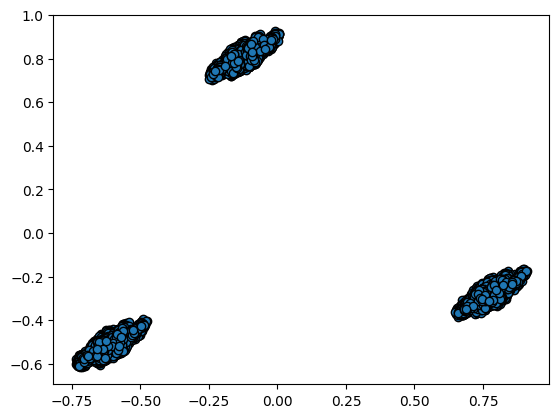

In [64]:
plt.scatter(df_pca[:,0], df_pca[:,1], edgecolor = 'black')
plt.show()


La gráfica de PCA (Análisis de Componentes Principales) que ves es una proyección bidimensional de tus datos originales, donde cada punto representa un individuo (o fila) de tu dataset, pero resumido en solo dos variables (componentes principales) que capturan la mayor parte de la variabilidad de los datos.

¿Cómo interpretarla?

Ejes: Los ejes son los dos primeros componentes principales (PC1 y PC2). No tienen un significado directo como las variables originales, pero representan combinaciones lineales de ellas.
Agrupaciones: Si ves grupos o “clusters” de puntos, significa que hay patrones o similitudes entre los datos que el PCA ha capturado. Por ejemplo, si hay tres grupos bien separados, puede indicar que existen tres tipos o perfiles principales en tus datos.
Distancia: Cuanto más separados estén dos puntos, más diferentes son en el conjunto de variables originales.
No hay etiquetas: Si no coloreaste los puntos por alguna variable, no sabes a qué grupo pertenece cada punto, pero puedes usar colores para ver si, por ejemplo, los grupos corresponden a una categoría (como género, diagnóstico, etc.).

### Matriz de transición

Una matriz de transición muestra la probabilidad de moverse de un estado a otro entre dos puntos temporales consecutivos. En tu caso, el estado puede ser, por ejemplo, el nivel de ansiedad categorizado en bajo, medio y alto riesgo.

In [75]:
### Discretización de la variable de ansiedad

def discretizar_ansiedad(n):
    if n <= 2:
        return 'Bajo'
    elif n <= 4:
        return 'Medio'
    else:
        return 'Alto'

df_total['Estado_Ansiedad'] = df_total['Anxiety Level (1-10)'].apply(discretizar_ansiedad)


In [91]:
print(df_total.columns[df_total.columns.duplicated()])


Index(['Age', 'Caffeine Intake (mg/day)', 'Heart Rate (bpm)'], dtype='object')


In [92]:
df_total = df_total.loc[:, ~df_total.columns.duplicated()]


In [93]:
## Generar ID por persona

id_cols = ['Gender_Female', 'Gender_Male', 'Gender_Other', 
           'Occupation_Artist', 'Occupation_Athlete', 'Occupation_Chef', 
           'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Freelancer', 
           'Occupation_Lawyer', 'Occupation_Musician', 'Occupation_Nurse', 
           'Occupation_Other', 'Occupation_Scientist', 'Occupation_Student', 
           'Occupation_Teacher', 'Age']

df_total['ID'] = df_total.groupby(id_cols).ngroup()


C:\Users\Diego\AppData\Local\Temp\ipykernel_28644\3589986975.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['ID'] = df_total.groupby(id_cols).ngroup()


In [95]:
## Ordenar persona por tiempo

df_total = df_total.sort_values(by=['ID', 'Fecha'])



In [89]:
df_total.head()

Gender_Female  Gender_Male  Gender_Other  Occupation_Artist  \
0          False         True         False              False   
1           True        False         False              False   
2           True        False         False              False   
3           True        False         False              False   
4          False        False          True              False   

   Occupation_Athlete  Occupation_Chef  Occupation_Doctor  \
0               False            False              False   
1               False            False              False   
2               False            False               True   
3                True            False              False   
4                True            False              False   

   Occupation_Engineer  Occupation_Freelancer  Occupation_Lawyer  ...  \
0                False                  False              False  ...   
1                 True                  False              False  ...   
2                False                  False              False  ...   
3                False                  False              False  ...   
4                False                  False              False  ...   

   Physical Activity (hrs/week)       Age  Caffeine Intake (mg/day)  \
0                           0.2  0.869565                  0.320534   
1                           0.6  0.456522                  0.612688   
2                           0.0  0.521739                  0.220367   
3                           0.2  0.543478                  0.602671   
4                           0.4  0.804348                  0.886477   

   Heart Rate (bpm)       Age  Caffeine Intake (mg/day)  Heart Rate (bpm)  \
0          0.966102  0.869565                  0.320534          0.966102   
1          0.898305  0.456522                  0.612688          0.898305   
2          0.322034  0.521739                  0.220367          0.322034   
3          0.152542  0.543478                  0.602671          0.152542   
4          0.084746  0.804348                  0.886477          0.084746   

        Fecha  Estado_Ansiedad  Siguiente_Estado  
0  31/12/2021            Medio               NaN  
1  31/12/2024            Medio               NaN  
2  31/12/2020             Alto               NaN  
3  31/12/2020             Bajo               NaN  
4  31/12/2020            Medio               NaN  

[5 rows x 39 columns]

In [96]:
## Generar transición de estados de ansiedad
df_total['Siguiente_Estado'] = df_total.groupby('ID')['Estado_Ansiedad'].shift(-1)


In [97]:
## Conteo de las transiciones 

transiciones = df_total.dropna(subset=['Siguiente_Estado'])
conteo = pd.crosstab(transiciones['Estado_Ansiedad'], transiciones['Siguiente_Estado'])
matriz_transicion = conteo.div(conteo.sum(axis=1), axis=0)


Text(0.5, 23.52222222222222, 'Siguiente Estado')

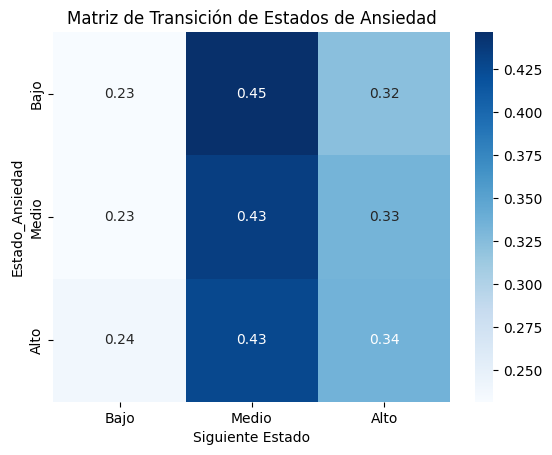

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

orden = ['Bajo', 'Medio', 'Alto']
matriz_ordenada = matriz_transicion.reindex(index=orden, columns=orden)

sns.heatmap(matriz_ordenada, annot=True, cmap='Blues')
plt.title("Matriz de Transición de Estados de Ansiedad")
plt.xlabel("Siguiente Estado")

### Evaluacion de variables para reducir la probabilidad de aumneto de nivel

In [100]:
df_total = df_total.sort_values(by=['ID', 'Fecha'])
df_total['Siguiente_Estado'] = df_total.groupby('ID')['Estado_Ansiedad'].shift(-1)
df_transiciones = df_total.dropna(subset=['Siguiente_Estado'])


<Axes: xlabel='Therapy Sessions (per month)', ylabel='Count'>

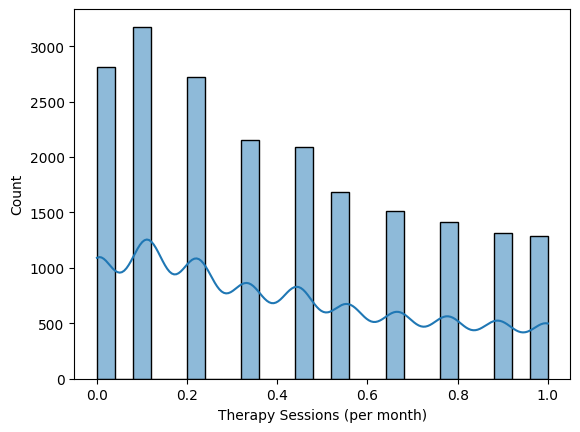

In [102]:
import seaborn as sns
sns.histplot(df_transiciones['Therapy Sessions (per month)'], kde=True)


In [103]:
umbral = df_transiciones['Therapy Sessions (per month)'].quantile(0.75)
df_transiciones['Terapia'] = df_transiciones['Therapy Sessions (per month)'] >= umbral


C:\Users\Diego\AppData\Local\Temp\ipykernel_28644\1256066758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transiciones['Terapia'] = df_transiciones['Therapy Sessions (per month)'] >= umbral


In [105]:
grupo_terapia = df_transiciones[df_transiciones['Terapia'] == True]
grupo_sin_terapia = df_transiciones[df_transiciones['Terapia'] == False]


In [107]:
def matriz_transicion(df):
    conteo = pd.crosstab(df['Estado_Ansiedad'], df['Siguiente_Estado'])
    return conteo.div(conteo.sum(axis=1), axis=0)



In [108]:
mt_terapia = matriz_transicion(grupo_terapia)
mt_sin_terapia = matriz_transicion(grupo_sin_terapia)


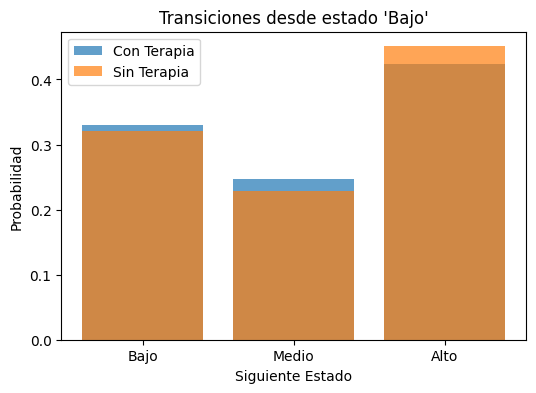

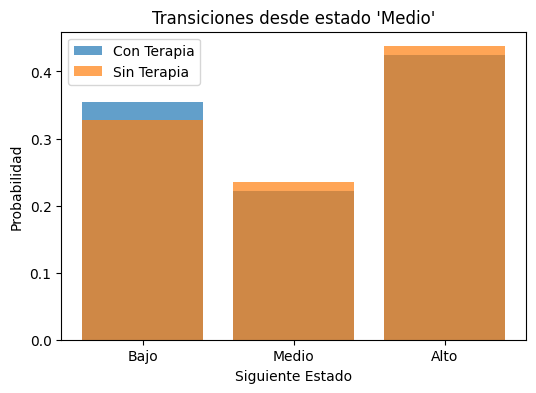

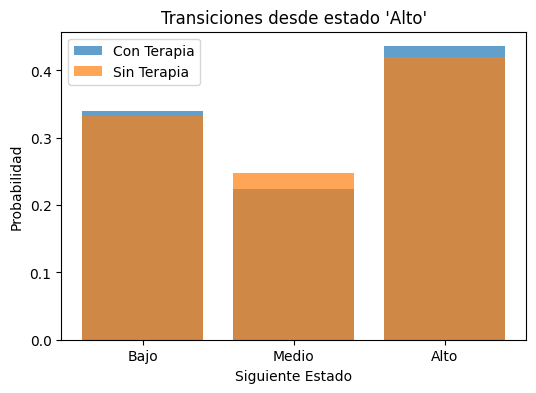

In [109]:


estados = ['Bajo', 'Medio', 'Alto']

for estado in estados:
    plt.figure(figsize=(6, 4))
    plt.bar(estados, mt_terapia.loc[estado], alpha=0.7, label='Con Terapia')
    plt.bar(estados, mt_sin_terapia.loc[estado], alpha=0.7, label='Sin Terapia')
    plt.title(f"Transiciones desde estado '{estado}'")
    plt.ylabel("Probabilidad")
    plt.xlabel("Siguiente Estado")
    plt.legend()
    plt.show()


### Modelacion con HMM

In [112]:
from hmmlearn import hmm



In [119]:
## Evaluando variables 

observaciones = df_total[['Anxiety Level (1-10)', 
                          'Breathing Rate (breaths/min)',
                          'Sleep Hours', 
                          'Heart Rate (bpm)',
                          'Physical Activity (hrs/week)']].dropna()
X = observaciones.values  # numpy array


In [124]:
## Ajustando el modelo HMM Gaussian

modelo_hmm = hmm.GaussianHMM(n_components=6, covariance_type="full", n_iter=100, random_state=42)
modelo_hmm.fit(X)


GaussianHMM(covariance_type='full', n_components=6, n_iter=100, random_state=42)

In [125]:
## Inferir estados ocultos
estados_ocultos = modelo_hmm.predict(X)


In [126]:
## Analisis de resultados

print("Matriz de transición oculta:")
print(modelo_hmm.transmat_)

print("\nMedia de observaciones por estado oculto:")
print(modelo_hmm.means_)


Matriz de transición oculta:
[[7.24908339e-03 2.08613813e-02 1.98624910e-01 3.75183929e-01
  3.10396819e-02 3.67041015e-01]
 [8.07139272e-02 1.91180228e-01 9.00930253e-02 5.39230342e-05
  5.76171857e-01 6.17870389e-02]
 [3.62098531e-01 1.59773842e-02 1.87688425e-01 7.18623341e-02
  4.33239735e-02 3.19049353e-01]
 [4.90947571e-01 7.41358734e-02 1.84300449e-01 1.40562888e-06
  1.50850035e-07 2.50614550e-01]
 [2.06326481e-01 1.43889391e-01 2.08106449e-02 2.04393143e-07
  6.28973278e-01 4.01113646e-11]
 [4.36178530e-01 1.88018780e-02 2.26793385e-01 1.69172223e-02
  4.00837096e-03 2.97300614e-01]]

Media de observaciones por estado oculto:
[[4.03827772 0.50473504 0.57732909 0.50589815 0.47931023]
 [1.35196052 0.48764265 0.63349762 0.50656178 0.51150842]
 [6.         0.6177892  0.25243741 0.63104058 0.29989708]
 [4.32692456 0.48344789 0.55529262 0.50748034 0.50207448]
 [3.59832202 0.51181909 0.54069406 0.5057848  0.49953755]
 [2.21509939 0.50445892 0.65064275 0.49313535 0.51013857]]


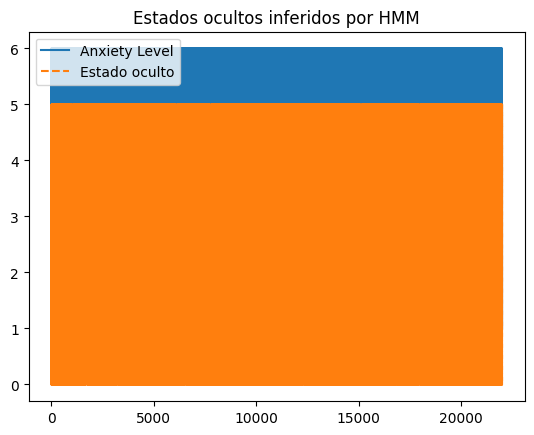

In [127]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0], label='Anxiety Level')
plt.plot(estados_ocultos, label='Estado oculto', linestyle='--')
plt.legend()
plt.title("Estados ocultos inferidos por HMM")
plt.show()


<Axes: >

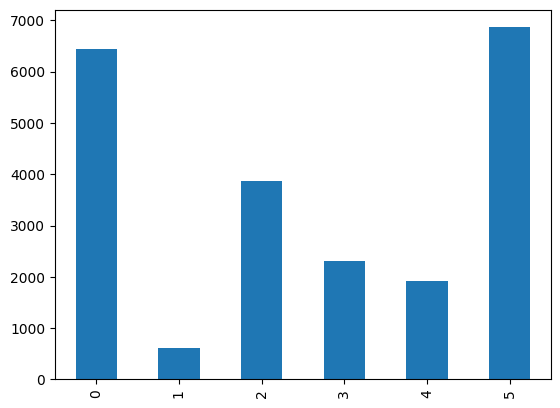

In [128]:
import pandas as pd
pd.Series(estados_ocultos).value_counts().sort_index().plot(kind='bar')


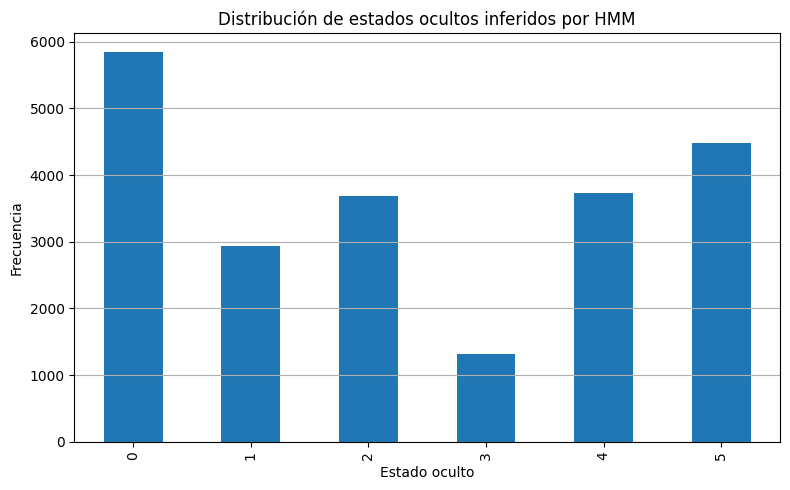

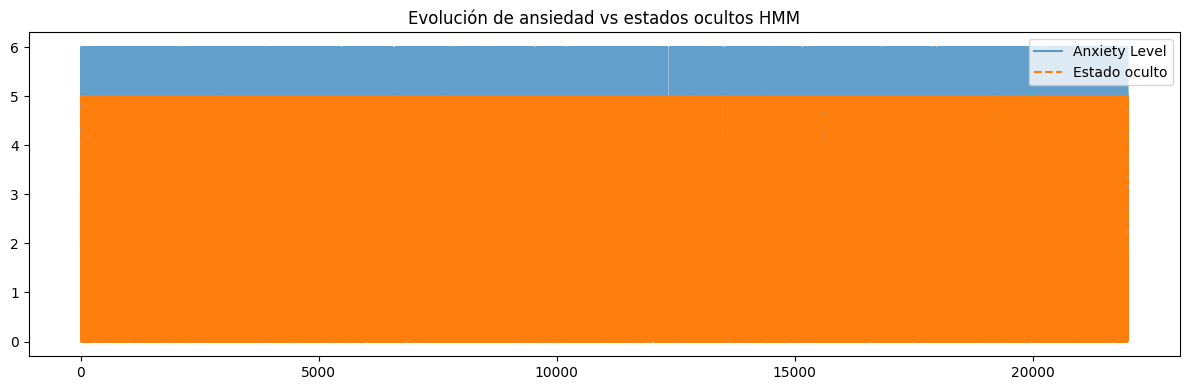

In [129]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from hmmlearn import hmm
import matplotlib.pyplot as plt

# === 1. Cargar y preparar los datos ===
# Reemplaza esto por tu propio DataFrame
# Ejemplo de columnas:
variables_observables = [
    'Anxiety Level (1-10)',
    'Breathing Rate (breaths/min)',
    'Sleep Hours',
    'Heart Rate (bpm)',
    'Physical Activity (hrs/week)'
]

df = df_total[variables_observables].dropna()  # Asegúrate de no tener nulos

# === 2. Escalar datos ===
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

# === 3. Entrenar HMM ===
n_estados = 6
modelo = hmm.GaussianHMM(n_components=n_estados, covariance_type='full', n_iter=200, random_state=42)
modelo.fit(X_scaled)

# === 4. Inferir estados ocultos ===
estados = modelo.predict(X_scaled)

# === 5. Agregar estados al DataFrame ===
df_estados = df.copy()
df_estados['Estado_HMM'] = estados

# === 6. Visualizar la distribución de estados ocultos ===
conteo = pd.Series(estados).value_counts().sort_index()
conteo.plot(kind='bar', figsize=(8, 5))
plt.title("Distribución de estados ocultos inferidos por HMM")
plt.xlabel("Estado oculto")
plt.ylabel("Frecuencia")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# === 7. Opcional: Visualizar trayectorias ===
plt.figure(figsize=(12, 4))
plt.plot(df['Anxiety Level (1-10)'].values, label='Anxiety Level', alpha=0.7)
plt.plot(estados, label='Estado oculto', linestyle='--')
plt.legend()
plt.title("Evolución de ansiedad vs estados ocultos HMM")
plt.tight_layout()
plt.show()
